<a href="https://colab.research.google.com/github/Nickimani/Airbnb_Project/blob/master/Airbnb_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Project

# 1. Business Understanding 

Airbnb, the dominant room-sharing website, has made disruptive impacts to the lodging industry by adding over three million listings in the market. This is as a result of high demand from customers who prefer airbnbs to hotels. The fact that each home is different, airbnbs has an unmatched amount of variety in terms of the exteriors, interiors and amenities. Even though each customer has his/her preference in terms of the amenities, there are those that almost all the customers love. Airbnbs with such amenities attract more customers and this is also replicated in the reviews and ratings that these customers give.

User and host experiences are essential for the success of this industry. Customers want to have a five star experience when they check into the airbnbs. According to a consumer survey commissioned by Airbnb, the majority of travelers say amenities are a top priority for a great trip. This is even more important now, as guests search for longer stays. On the other hand, the hosts want to get as many customers as possible. What’s more, guests often filter their search results to find 10 top amenities. To stand out in search results, the hosts must make sure they’re adding or updating their amenities to include these in their listing if they have them.

As a company, we are looking to optimize user and host experience in this industry. To optimize user experience, we will build a recommendation system that recommends the best-rated Airbnbs based on amenities associated with that listing.

For the hosts, the success of Airbnbs depends on several factors, and starters might not know how to make their houses attractive to users and make them successful. Also, people already in the business might not understand why their properties are not getting high ratings. As a consulting company, we plan to help them know how to get the coveted 5-star rating and become Superhosts.

### 1.2 Main objective

- To do an analysis of South africa Airbnb data comparing superhosts and standard hosts 
- To build a content-based recommendation system for Airbnbs in Cape Town and Western Cape areas in South Africa.


 


### 1.3 Specific Objectives
 
- To deploy a recommendation system for Airbnbs recommends the best matches from a user's description
 
- To find out what amenities are popular/attractive to users?

- To determine factors that influence the price

- Compare the differences between superhosts and standard hosts
 
- To use natural language preprocessing to evaluate if specific words are used in high rated Airbnbs reviews
 

 

### 1.4 Metrics of Success

The project will be considered a success if the objectives are met.

# 2. Data Understanding

Data that will be used for this analysis was obtained from Inside Airbnb: Get the Data.  This data is constituted as follows. 
 - The Airbnb dataframe has 18,903 rows and 74 columns. 41 of the columns are of numeric type and the remaining 33 are of object type.
 - The User reviews dataframe has 363,065 rows and 6 columns. 3 of the columns are of numeric data type and 3 are of object type.
 
5 columns in the Airbnb dataframe contain >90% NaN values.

Some of the features that are relevant with our business problem include:

 -  Id  - Airbnb's unique identifier for the listing
 - Listing_url - Inside Airbnb "Scrape" this was part of
 - Host_url - The Airbnb page for the host
 - Last_scraped - UTC. The date and time this listing was "scraped"
 - Name - Name of the listing
 - Description - Detailed description of the listing
 - Neighborhood_overview - Host's description of the neighborhood
 - Host_since - The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest
 - Neighbourhood_cleansed - The neighborhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles
 - Host_response_rate -  The rate at which the host responds when called upon
 - Host_acceptance_rate - That rate at which a host accepts booking requests
 - Host_is_superhost - Whether the host has a superhost rating or not
 - Latitude - Uses the World Geodetic System (WGS84) projection for latitude and longitude
 - Longitude - Uses the World Geodetic System (WGS84) projection for latitude and longitude
 - Property_type - Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field
 - Room_type -  All homes are grouped into the following three room types: Entire place, Private room, Shared room, Entire place
 - Accommodates - The maximum capacity of the listing
 - Bathrooms_text - The number of bathrooms in the listing. On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used
 - Bedrooms - The number of bedrooms
 - Beds - The number of bed(s)
 - Amenities - Basic items the guests gets in the airbnb that helps to make them comfortable
 - Price - daily price in local currency
 - Number_of_reviews - The number of reviews the listing has
 - Review_scores_rating - The airbnb customer review rating 
 - Review_scores_accuracy - How accurate the review scores are
 - Review_scores_cleanliness - The score given by the guest in regards to the airbnb’s cleanliness
 - Review_scores_checkin - The star rating given by the guest in regards to the checkin
 - Review_scores_communication - The score given by the guest in regards to how effective the host’s communication is
 - Review_scores_location - The airbnb location rating given by the guest
 - Instant_bookable - Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing
 - Calculated_host_listings_count - The number of listings the host has in the current scrape, in the city/region geography
 

# 3. Loading Data

## 3.1 Importing Libraries

In [1]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive', timeout_ms=900000) # timeout = 15 min

Mounted at /content/drive


In [2]:
# installing necessary libraries
# Reverse geoencoder
!pip install reverse_geocoder 
# pandas profiling
!pip install pandas_profiling

!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 4.1 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=4073ac9f0a202b17e2b8c4a077a3aa3ccb7a6339d1997072a44ad88f37f0d077
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.0 MB/s 


In [3]:
# importing libraries

import string
import time
import re
import pickle

import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import reverse_geocoder as rg

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 3.2 Loading The DataFrames

In [5]:
# loading the DataFrames
listings_df = pd.read_csv('/content/drive/Shareddrives/CapStone/Data/listings.csv')
reviews_df = pd.read_csv('/content/drive/Shareddrives/CapStone/Data/reviews.csv')
metadata_df = pd.read_csv('/content/drive/Shareddrives/CapStone/Data/data_dictionary.csv')

In [6]:
# a function returning the datastructure of a the input dataframe
def data_structure(dataframe, data_name):
    """ 
    Returns datashape and data info. 
    """
    print(f'{data_name} dataframe shape:', dataframe.shape)
    print('-'*120)
    print(dataframe.info())

# a function returning a dataframe of the completeness of the features in the input dataframe
def percentage_completeness(dataframe):
    """
    Returns a dataframe showcasing the percentage completeness of the columns in a dataframe    
    """
    # length of dataframe
    tot_entries = len(dataframe) 
    # name of columns list
    columns = list(dataframe.columns) 
    perc_completeness = [] 

    for column in columns:
        # taking number of missing records
        missing = dataframe[column].isna().sum() 
        # calculating percentage of completeness in column
        perc_null_counts = (1 - (missing / tot_entries)) * 100 
        perc_completeness.append(round(perc_null_counts, 2)) 
    # creating dataframe of column and completeness
    output = pd.DataFrame(list(zip(columns, perc_completeness)), 
                          columns=['Feature', '%_completeness']) 
    # sorting the values
    output = output.sort_values(by='%_completeness', ascending=True) 
    output.reset_index(inplace=True, drop=True)

    return output

# a function that pulls valuecounts from a column
def value_count(dataframe, column):
    """
    Returns the value counts for unique value in the column specified
    """
    # getting the value counts
    val_count = dataframe[column].value_counts() 
    # converting list output to dataframe
    result = val_count.to_frame(name='Count(s)') 

    return result

# a funtion for removing the % sign from the strings    
def strip_signs(dataframe, column):
    """
    Takes in a dataframe and the column to be cleaned. 
    The column should have a prefix of suffix that if removed,would make the column convertible to a numeric datatype
    Returns a replacement of the input column cleaned and converted to float dtype.
    """
    # making sure its a series
    feature = pd.Series(dataframe[column]) 
    # striping % sign from string
    feature = feature.str.strip(to_strip='%') 
    # converting datatype
    final_feature = feature.astype('float') 

    return final_feature


# a function for plotting a boxplot for a series
def box_plot(series):
    """
    Returns a boxplot of the column specified    
    """
    fig, ax = plt.subplots(figsize=(20,10))
    # creating the boxplot
    ax = sns.boxplot(x=series, linewidth=1, palette='Set2') 
    # Give the plot a main title
    ax.set_title(f'{series.name}, Airbnb Cape town', fontsize=30,pad=30) 
    # Set text for the x axis,
    ax.set_xlabel(series.name, fontsize=20, labelpad=15)
    sns.despine(offset=5, left=True);

# Build a function for regex stripping maybe linked to strip signs

### Data Structure

In [7]:
# data_structure(listings_df, 'listing_df') # listings df structure

The original listings dataFrame has 18903 rows with 74 columns. 41 of the columns are of numeric type and The remaining 33 are of object type.

In [8]:
# selecting important columns as per the business problem
relevant_cols = ['id', 'listing_url', 'host_url', 'last_scraped', 'name', 'description', 
                 'neighborhood_overview', 'host_since', 'neighbourhood_cleansed', 
                 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
                 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
                 'amenities', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count'
                 ]
# subsetting a dataframe of the relevant columns
listings_df = listings_df[relevant_cols]

In [9]:
# new_listings df structure
data_structure(listings_df, 'listing_df') 

listing_df dataframe shape: (18903, 32)
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18903 non-null  int64  
 1   listing_url                     18903 non-null  object 
 2   host_url                        18903 non-null  object 
 3   last_scraped                    18903 non-null  object 
 4   name                            18903 non-null  object 
 5   description                     18560 non-null  object 
 6   neighborhood_overview           11610 non-null  object 
 7   host_since                      18902 non-null  object 
 8   neighbourhood_cleansed          18903 non-null  object 
 9   host_response_time              14710 non-null  object

In [10]:
# viewing listings df
listings_df.head(3) 

,id,listing_url,host_url,last_scraped,name,description,neighborhood_overview,host_since,neighbourhood_cleansed,host_response_time,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count
0,30332317,https://www.airbnb.com/rooms/30332317,https://www.airbnb.com/users/show/98554302,2022-06-22,Riverside cottage,Riverside cottage is a comfortable unit with v...,NaN,2016-10-07,Ward 15,within an hour,...,"$1,350.00",2,5.00,5.0,5.0,5.0,5.0,5.00,t,7
1,9126484,https://www.airbnb.com/rooms/9126484,https://www.airbnb.com/users/show/3410651,2022-06-22,Jubilee Square Apartment,Comfortably furnished 1st floor 2 bedroom apar...,The apartment is situated on the main street d...,2012-08-29,Ward 61,within a few hours,...,"$1,750.00",15,4.87,5.0,5.0,5.0,5.0,4.93,f,1
2,44482125,https://www.airbnb.com/rooms/44482125,https://www.airbnb.com/users/show/98554302,2022-06-22,Willow Cottage,Willow cottage overlooks our rose gardens and ...,NaN,2016-10-07,Ward 15,within an hour,...,"$1,350.00",0,NaN,NaN,NaN,NaN,NaN,NaN,t,7


In [11]:
# reviews_df structure
data_structure(reviews_df, 'reviews_df') 

reviews_df dataframe shape: (363065, 6)
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363065 entries, 0 to 363064
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     363065 non-null  int64 
 1   id             363065 non-null  int64 
 2   date           363065 non-null  object
 3   reviewer_id    363065 non-null  int64 
 4   reviewer_name  363065 non-null  object
 5   comments       363018 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.6+ MB
None


Reviews dataframe has only 1 column with nan values.
The nature of the comments column makes it difficult to fill the nan values.

In [12]:
# dropping nan values in reviews_df
reviews_df.dropna(inplace=True)

# viewing reviews df
reviews_df.head(3) 

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,30332317,597314314,2020-01-25,7812767,Alan,Lovely rustic accommodation in a picturesque r...
1,30332317,532436007654450454,2022-01-04,367340518,Courtney,The hosts are friendly and takes good care of ...
2,9126484,63063726,2016-02-20,50272994,Carla,6 St Georges Building was lovely in every way....


# 4. Data cleaning

## 4.1 Completeness

In [13]:
# checking percentage null value counts in listings 
listings_completeness = percentage_completeness(listings_df) 
# filtering out columns with complete records
listings_completeness = listings_completeness[listings_completeness['%_completeness'] < 100] 
listings_completeness

,Feature,%_completeness
0,neighborhood_overview,61.42
1,review_scores_location,71.97
2,review_scores_checkin,71.97
3,review_scores_communication,71.98
4,review_scores_accuracy,71.98
5,review_scores_cleanliness,71.99
6,review_scores_rating,72.79
7,host_response_time,77.82
8,host_response_rate,77.82
9,host_acceptance_rate,87.51


In [14]:
# checking number of columns with missing values
print('The number of columns with missing values are:', len(listings_completeness))

The number of columns with missing values are: 16


### neighborhood overview

In [15]:
listings_df['neighborhood_overview'] = listings_df['neighborhood_overview'].fillna('')

### description column

In [16]:
listings_df['description'] = listings_df['description'].fillna('')

### bathrooms_text feature
~2% of data is missing in bathrooms_text column.

In [17]:
# checking bathrooms unique values
listings_df['bathrooms_text'].unique()[:10] 

array(['1 bath', '2 baths', '1.5 baths', '5 baths', '3 baths',
       '3.5 baths', '1 private bath', '6.5 baths', '2.5 baths',
       '4.5 baths'], dtype=object)

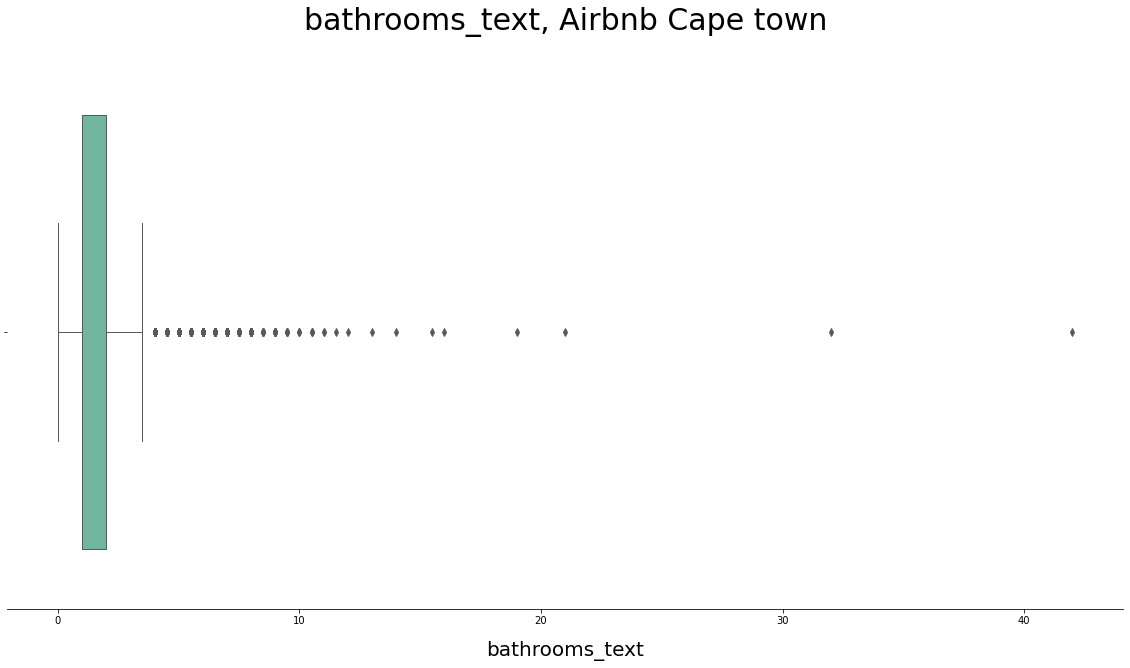

In [18]:
# strip the records to remain with the numerical value strings
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].str.extract('(\d+\.?\d*)')
# changing column to float
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].astype('float')
# checking if there are outliers in bathrooms_text
box_plot(listings_df['bathrooms_text']) 

bathrooms median is 1.

In [19]:
# fill missing values with median
listings_df['bathrooms_text'].fillna(value=listings_df['bathrooms_text'].median(), inplace=True) 
# changing column name 
listings_df.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)

### 'review_score' features

Dealing with columns that have 'review_score' in their labels. 

There is ~30% missing values in 'review_score_' columns.

In [20]:
# Creating a list of the review_score columns
review_list = [column for column in listings_df.columns if 'review_score' in column.strip()]
# subsetting a dataframe of review list
review_cols_df = listings_df[review_list].copy() 
# checking the datatype for these columns
listings_df[review_list].dtypes

review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
dtype: object

All review_score_ columns are of numeric type.

In [21]:
# checking the column descriptions
review_cols_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
review_scores_rating,13760.0,4.666231,0.684017,0.0,4.64,4.86,5.0,5.0
review_scores_accuracy,13607.0,4.757262,0.490736,0.0,4.73,4.91,5.0,5.0
review_scores_cleanliness,13608.0,4.730264,0.492878,0.0,4.67,4.89,5.0,5.0
review_scores_checkin,13604.0,4.808905,0.462444,0.0,4.81,4.97,5.0,5.0
review_scores_communication,13607.0,4.802807,0.479074,0.0,4.81,4.97,5.0,5.0
review_scores_location,13604.0,4.803673,0.414366,0.0,4.78,4.93,5.0,5.0


The missing values will be filled with the median of the respective column.

In [22]:
# imputing missing values with median
listings_df[review_list] = listings_df[review_list].fillna(listings_df[review_list].median())

In [23]:
# rounding off ratings values 
listings_df[review_list] = listings_df[review_list].round(0)

In [24]:
# # checking value counts
# for feature in review_list:
#     print(value_count(listings_df, feature))
#     # limiting long output

The number of rating scores that equal to 0 after rouding off are negligible compared to the size of the dataset and other class couts. A zero rating doesn't make much sense, changing them to 1 is more sensible.

In [25]:
for feature in review_list:
    # replacing 0 values with 1
    listings_df[feature] = listings_df[feature].replace(to_replace=0, value=1) 

### bedrooms & beds features
~6% of data is missing from bedrooms and ~2% is missing from beds columns.

In [26]:
# bedrooms unique values
print(listings_df['bedrooms'].unique()[:23])
print()
# beds unique values
print(listings_df['beds'].unique()[:10])

[ 1.  2.  5.  3. nan  6.  4. 10.  7.  8.  9. 12. 16. 19. 41. 40. 11. 14.
 13. 18. 17. 15. 20.]

[ 1.  3.  2.  4.  5.  6.  8. nan  7. 49.]


There seems to be outliers in these columns. 

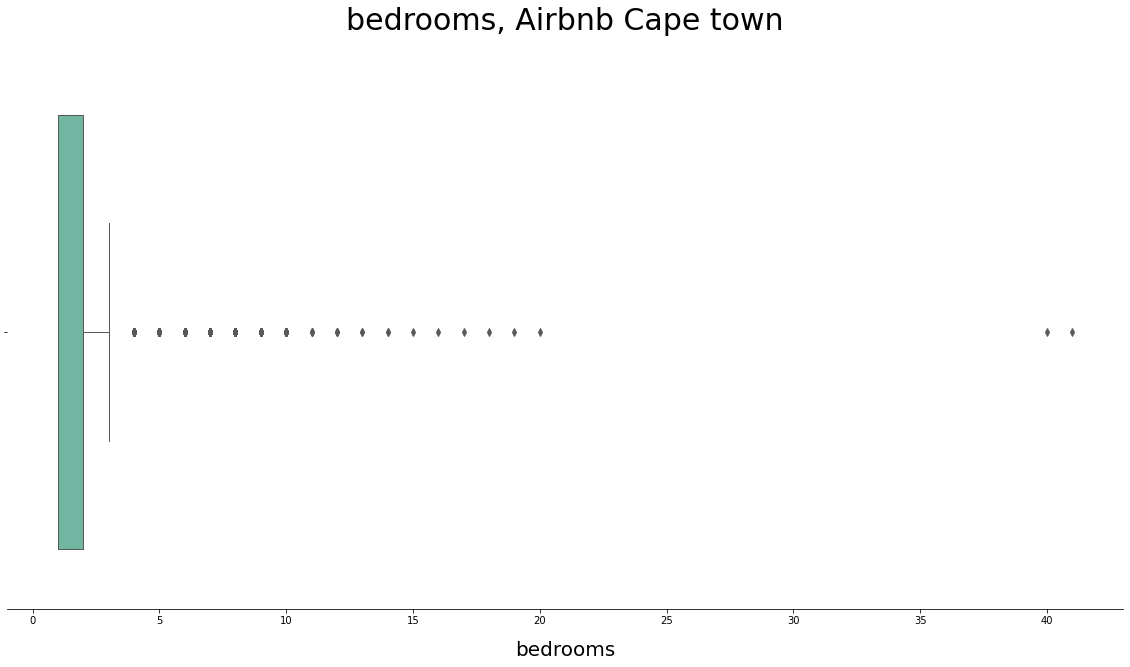

In [27]:
# checking if there are outliers in the bedrooms column
box_plot(listings_df['bedrooms'])

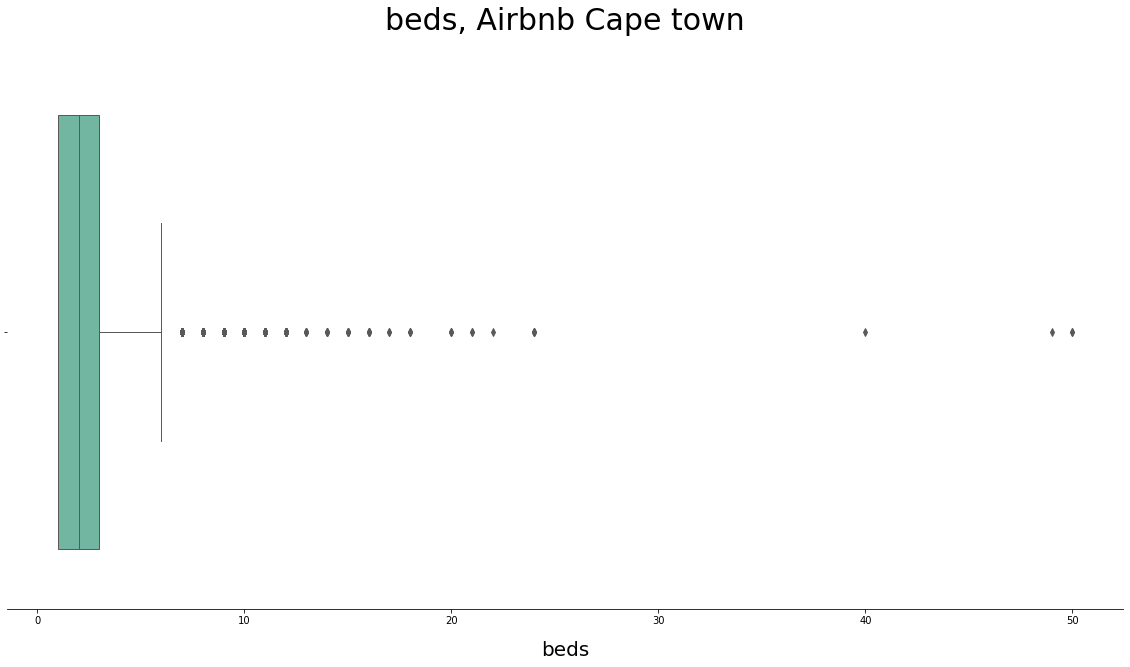

In [28]:
# checking if there are outliers in the bed column
box_plot(listings_df['beds']) 

In [29]:
# subsetting extreme outliers in bedrooms and beds columns
listings_df[(listings_df['bedrooms'] >= 24) | (listings_df['beds'] >= 24)][['bedrooms', 'beds', 'price', 'bathrooms']]

,bedrooms,beds,price,bathrooms
148,10.0,49.0,$840.00,32.0
1742,12.0,24.0,"$3,361.00",2.0
7064,12.0,24.0,"$9,800.00",6.0
8401,41.0,50.0,"$1,689.00",1.0
8966,40.0,50.0,$807.00,42.0
12250,1.0,24.0,$350.00,1.0
12517,14.0,24.0,$400.00,2.0
12518,13.0,40.0,$686.00,9.0


In [30]:
# shape before dropping outliers
print('Shape Before:', np.shape(listings_df))
# dropping outliers
listings_df = listings_df[listings_df['beds'] < 24].copy()
listings_df = listings_df[listings_df['bedrooms'] < 24].copy()
# shape after
print('Shape After:', np.shape(listings_df))
# values dropped
print('Records dropped:', 1428)

Shape Before: (18903, 32)
Shape After: (17475, 32)
Records dropped: 1428


median for bedrooms is 1 and for beds is 2.

In [31]:
# fill missing values with the median
listings_df['bedrooms'].fillna(value=listings_df['bedrooms'].median(), inplace=True)
# fill missing values
listings_df['beds'].fillna(value=listings_df['beds'].median(), inplace=True)

### 'host' features

Dealing with host_response_time, host_response_rate and host_acceptance_rate columns.

host_response_time and host_response_rate have ~23% of missing data, and host_acceptance_rate has ~13% of missing data.

In [32]:
# making a list of the columns being tackled
host_reactions = ['host_response_time', 'host_response_rate', 'host_acceptance_rate']
# checking unique counts
print('host_response_time unique counts are:', listings_df[host_reactions[0]].nunique())
print()
print(listings_df['host_response_time'].unique())
print()
print('host_response_rate unique counts are:', listings_df[host_reactions[1]].nunique())
print()
print(listings_df[host_reactions[1]].unique()[:10])
print()
print('host_acceptance_rate unique counts are:', listings_df[host_reactions[2]].nunique())
print()
print(listings_df[host_reactions[2]].unique()[:10])

host_response_time unique counts are: 4

['within an hour' 'within a few hours' nan 'within a day'
 'a few days or more']

host_response_rate unique counts are: 42

['100%' nan '50%' '80%' '87%' '67%' '75%' '33%' '90%' '70%']

host_acceptance_rate unique counts are: 87

['100%' '50%' '67%' '71%' nan '94%' '93%' '11%' '83%' '99%']


host_response_time is a categorical column, its missing values will be imputed with 'unknown' as a category. The other 2 columns should be numerical but have been recorded as strings. Some manipulations need to be done to them.

In [33]:
# filling nan values with unknown
listings_df['host_response_time'] = listings_df['host_response_time'].fillna('unknown') 
# stripping % signs from the columns
listings_df['host_response_rate'] = strip_signs(listings_df, 'host_response_rate')
listings_df['host_acceptance_rate'] = strip_signs(listings_df, 'host_acceptance_rate') 

host_response_rate median is 100% while host_acceptance median is 95%. Is that the general trend?

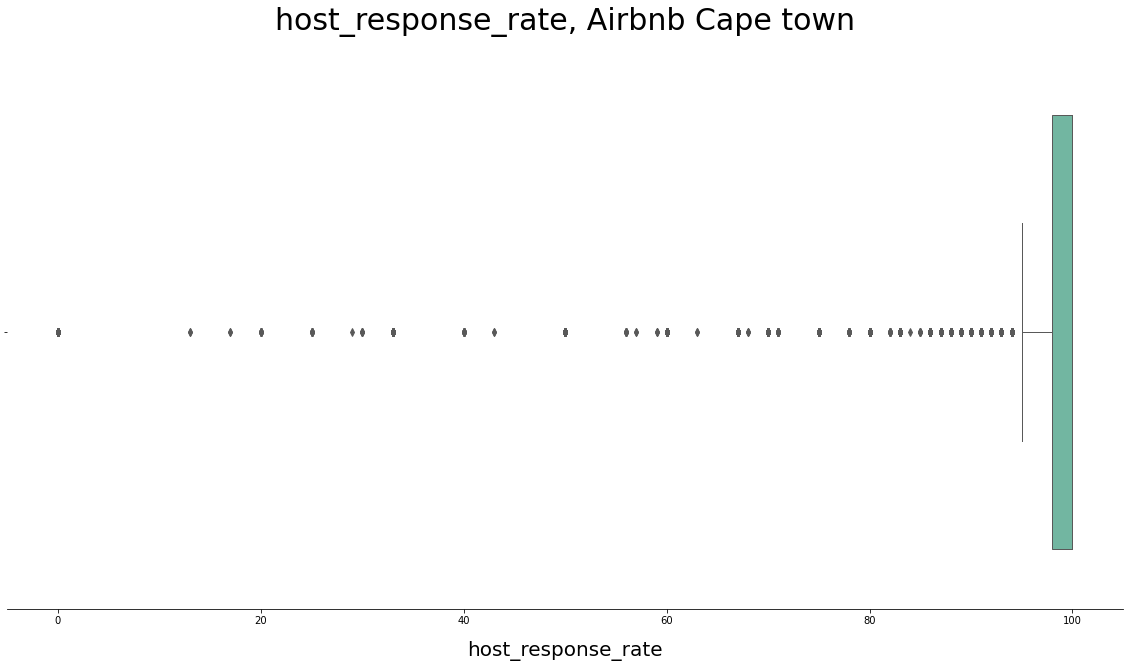

In [34]:
# boxplot of host_response_rate
box_plot(listings_df['host_response_rate'])

In [35]:
# filling missing values with median
listings_df['host_response_rate'].fillna(value=listings_df['host_response_rate'].median(), inplace=True) 

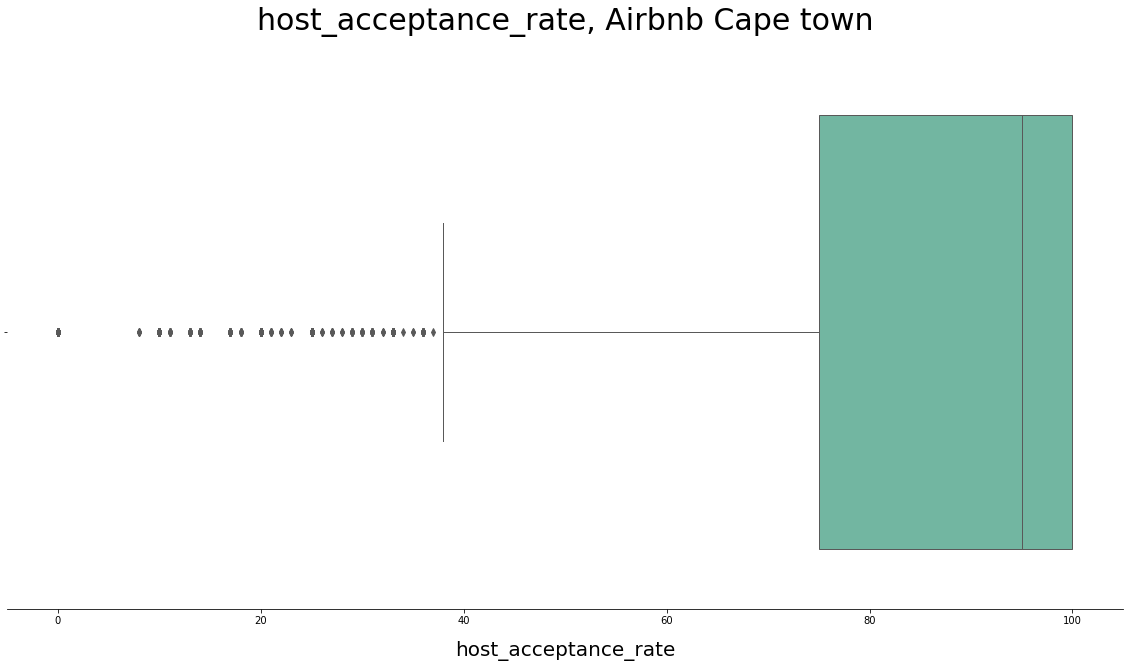

In [36]:
# boxplot of host_acceptance rate
box_plot(listings_df['host_acceptance_rate']) 

In [37]:
# filling missing values with median
listings_df['host_acceptance_rate'].fillna(value=listings_df['host_acceptance_rate'].median(), inplace=True)

Dealing with host_since and host_is_superhost.

In [38]:
# list of 'host' columns that have been dealt with already
already_dealt = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_location']
# making a list of columns containing 'host' in their names but that haven't been dealt with
rem_host_cols = [column for column in listings_df.columns if 'host' in column.strip() and column not in already_dealt]
# filtering out 'host columns' that are complete
host_traits = [column for column in rem_host_cols if column in list(listings_completeness['Feature'])]
host_traits

['host_since', 'host_is_superhost']

both of them have ~0.01% of missing values.

In [39]:
# sum of nan values in host_since
print(listings_df['host_since'].isna().sum())
# Dropping null row 
listings_df.dropna(subset= ["host_since"], inplace= True) 

1


The missing value in both features are in the same row.

In [40]:
# viewing the host columns
listings_df[host_traits].head(3) 

,host_since,host_is_superhost
0,2016-10-07,f
1,2012-08-29,f
2,2016-10-07,f


The host_since column contains dates of when a host started being a host. The values in this column will be sliced, and only the year will be left. The column will also be transformed into a integer data type.

In [41]:
# slicing the year off the records
listings_df['host_since'] = listings_df['host_since'].apply(lambda x: x[:4]) 
# changing column to int
listings_df['host_since'] = listings_df['host_since'].astype(int) 

host is superhost needs to be transformed into a better representation for a binary category.

In [42]:
# repacing values to make column a bool dtype
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].replace({'t': 1, 'f': 0})

## 4.2 uniqueness

In [43]:
# checking for duplicates
listings_df.drop(columns='amenities').duplicated().sum()

0

There are no duplicates.

## 4.3 Cleaning the remaining features

### instant_bookable feature

In [44]:
# checking value_counts
listings_df['instant_bookable'].value_counts()

f    9805
t    7669
Name: instant_bookable, dtype: int64

In [45]:
# repacing values to make column a bool dtype
listings_df['instant_bookable'] = listings_df['instant_bookable'].replace({'t': 1, 'f': 0})

### price feature

In [46]:
listings_df.price[:2]

0    $1,350.00
1    $1,750.00
Name: price, dtype: object

In [47]:
# changing price to numeric
listings_df.price = listings_df.price.replace('[\$,]', '', regex=True).astype(float)

### coordinate features

Dealing with latitude & longitude 

In [48]:
coordinates = listings_df[['latitude', 'longitude']].copy()
# reseting index of test
coordinates.reset_index(inplace= True)

In [49]:
len(coordinates)

17474

In [50]:
#  loop to obtain name of cities
# cities= []
# for i in range(len(coordinates)):
#   coordinates = (coordinates['latitude'][i], test['longitude'][i])
#   geo_coord = rg.search(coordinates)
#   city = geo_coord[0]['name']
#   cities.append(city)
#   time.sleep(.001)


In [51]:
# with open('/content/drive/Shareddrives/CapStone/Data/cities.pkl', 'wb') as f:
#   pickle.dump(cities, f)

In [52]:
with open('/content/drive/Shareddrives/CapStone/Data/cities.pkl', 'rb') as f:
  cities = pickle.load(f)

In [53]:
# merging to the listings dataframe, dropping longitudes and latitude
listings_df.reset_index(inplace= True)
listings_df['cities'] = cities
listings_df.drop(columns= ['latitude', 'longitude'], inplace= True)

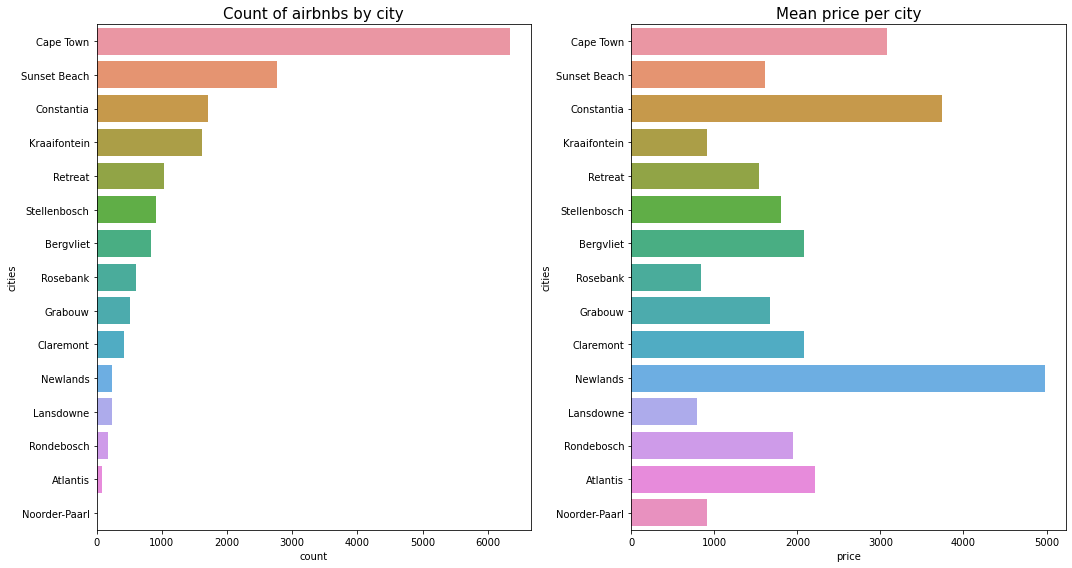

In [54]:
# countplot of cities frequency in the dataframe
fig, ax = plt.subplots(ncols=2, figsize= (15, 8))
sns.countplot(y= 'cities', data= listings_df, order= listings_df['cities'].value_counts().index, ax = ax[0])
ax[0].set_title('Count of airbnbs by city', fontsize=15);

#barplot of mean price of cities
sns.barplot(y='cities', x='price', data=listings_df, order=listings_df['cities'].value_counts().index, ci=None, ax = ax[1])
ax[1].set_title('Mean price per city',fontsize=15)
plt.tight_layout();


* Cape Town has the most airbnb homes. Noorder-Paarl has the least airbnb homes. The variation in the number of airbnbs could be attributed to different factors in this dataset, for example, Cape Town is the capital of this province and hence a more attractive investment prospect especially in the hospitality field.

**High prices in Newlands, Constantia, Atlantis, Rondebosch, Claremont**

* Newlands is known for Newlands Forest, with hiking trails leading up Table Mountain and sweeping views over Cape Town.
* Constantia is an affluent suburb of Cape Town, South Africa. It is considered to be one of the most prestigious suburbs in South Africa
* Atlantis- lack of housing
* Rondebosch is primarily a residential suburb, with shopping and business districts as well as the main campus of the University of Cape Town
* Claremont-currently experiencing significant growth and development

**Low prices in Kraainfontein**

* Kraainfontein has twice the number of  private rooms than entire homes

In [55]:
# room types in Kraainfontein
dff = listings_df[listings_df['cities'].isin(['Kraaifontein'])][['room_type']]
dff.room_type.value_counts()

Private room       1103
Entire home/apt     491
Hotel room           14
Shared room           3
Name: room_type, dtype: int64

### amenities feature & amenities_count feature engineering

In [56]:
# viewing amenities column
listings_df['amenities'].head() 

0    ["Hot water", "Cooking basics", "Iron", "Free ...
1    ["Hot water", "Cooking basics", "Iron", "Dryin...
2    ["TV", "Long term stays allowed", "Cooking bas...
3    ["TV", "Gym", "Long term stays allowed", "Heat...
4    ["TV", "Long term stays allowed", "Heating", "...
Name: amenities, dtype: object

In [57]:
# creating a list of lower and uppercase letters 
letters = string.ascii_letters
# splitting each record to extract the amenities
amenities_split = listings_df['amenities'].apply(lambda x: x.split('"'))
new_amenities = []
# making a list of lists 
for split in amenities_split:
    res = [x for x in split if x[0] in letters]
    new_amenities.append(res)

# replacing amenities with the list of lists
listings_df['amenities'] = new_amenities
# engineering a new column that is the count of amenities per record
listings_df['amenities_count'] = listings_df['amenities'].apply(lambda x: len(x))
# checking unique counts
listings_df['amenities_count'].nunique()

81

In [58]:
# viewing the top 6 number of amenities in a listing
listings_df['amenities_count'].sort_values(ascending=False).head(6)

1749     87
7703     84
965      79
6203     79
11820    78
926      76
Name: amenities_count, dtype: int64

In [59]:
# checking a row that has amenities_count greater than 70
listings_df[listings_df['amenities_count'] > 70]['amenities'][403]

['Board games',
 'Hot water',
 'Cleaning products',
 'Cooking basics',
 'Indoor fireplace',
 'Iron',
 'Drying rack for clothing',
 'TV with standard cable',
 'Coffee maker',
 'BBQ grill',
 'Dining table',
 'Washer',
 'Ethernet connection',
 'Pocket wifi',
 'Portable fans',
 'Private hot tub',
 'Free residential garage on premises \\u2013 4 spaces',
 'Private pool',
 'Bed linens',
 'Free street parking',
 'Freezer',
 'Dryer',
 'High chair',
 'Shampoo',
 'Clothing storage: wardrobe',
 'Crib',
 'Bathtub',
 'Outdoor furniture',
 'Private entrance',
 'Keypad',
 'Cleaning before checkout',
 'Wifi',
 'Safe',
 'Outdoor dining area',
 'Heating',
 'Conditioner',
 'Children\\u2019s books and toys for ages 0-2 years old',
 'Baking sheet',
 'Private patio or balcony',
 'Changing table',
 'Stove',
 'Elevator',
 'Extra pillows and blankets',
 'Hot water kettle',
 'Wine glasses',
 'Children\\u2019s dinnerware',
 'First aid kit',
 'Microwave',
 'Refrigerator',
 'Hair dryer',
 'Laundromat nearby',
 'Bar

### last_scraped feature & hosting_duration feature engineering

In [60]:
# viewing 'scrape' columns
listings_df['last_scraped'].head(2) 

0    2022-06-22
1    2022-06-22
Name: last_scraped, dtype: object

In [61]:
# slicing the year from last scraped
listings_df['last_scraped'] = listings_df['last_scraped'].apply(lambda x: x[:4]) 
# changing column data type
listings_df['last_scraped'] = listings_df['last_scraped'].astype(int) 
# creating a column to show age of the host
listings_df['hosting_duration'] = listings_df['last_scraped'] - listings_df['host_since']
# dropping last_scrapped and host_since columns
listings_df.drop(columns= ['last_scraped', 'host_since'], inplace= True) 

Our data cleaning is finished. Now we do bivariate analysis

# 5. EDA

In [62]:
# categorical variables 
categorical_cols = ['host_response_time', 'host_response_rate','host_acceptance_rate', 'host_is_superhost', 'room_type',
                    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'hosting_duration', 'review_scores_rating', 
                    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'instant_bookable', 'calculated_host_listings_count', 'amenities_count']
                        

## 5.1 Binning some categorical columns

In [63]:
# function to bin host response rate and acceptance rate
def bin_column(dataframe, column, new_col):
 
  bins = [0, 50, 70, 89, 100]
  labels = ['0-50', '51-70', '71-89', 'above 90']
  dataframe[new_col] = pd.cut(dataframe[column], bins=bins, labels=labels)

  return dataframe.head(1)


### 5.1.1 host response rate and host acceptance rate

In [64]:
#host response rate
bin_column(listings_df,'host_response_rate','response_rate')

# host_acceptance rate
bin_column(listings_df,'host_acceptance_rate','acceptance_rate')

,index,id,listing_url,host_url,name,description,neighborhood_overview,neighbourhood_cleansed,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,cities,amenities_count,hosting_duration,response_rate,acceptance_rate
0,0,30332317,https://www.airbnb.com/rooms/30332317,https://www.airbnb.com/users/show/98554302,Riverside cottage,Riverside cottage is a comfortable unit with v...,,Ward 15,within an hour,100.0,...,5.0,5.0,5.0,1,7,Stellenbosch,23,6,above 90,above 90


### 5.1.2 accommodates, beds, bedrooms, bathrooms columns

In [65]:
# features correlation
listings_df[['accommodates','beds','bedrooms','bathrooms']].corr()

,accommodates,beds,bedrooms,bathrooms
accommodates,1.000000,0.853642,0.888412,0.798609
beds,0.853642,1.000000,0.828616,0.719420
bedrooms,0.888412,0.828616,1.000000,0.848388
bathrooms,0.798609,0.719420,0.848388,1.000000


* These features seem to be strongly correlated which means they give us same information and thus we decided to use one of them(accommodates) for our analysis

In [66]:
# binning the accommodates column
bins = [0, 4, 8, 12, 16]
labels = ['1-4 people', '5-8 people', '9-12 people', 'above 12 people']
listings_df['accommodate'] = pd.cut(listings_df['accommodates'], bins=bins, labels=labels)

### 5.1.3 Number of amenities

In [67]:
# binning amenities_count 
bins = [0, 10, 20, 30, 100]
labels = ['0-10', '11-20', '21-30', 'above 30']
listings_df['amenities_binned'] = pd.cut(listings_df['amenities_count'], bins=bins, labels=labels)

### 5.1.4 Which are the most common amenities in the high rated airbnbs?

In [68]:
# listings with overall rating of 5
high_listings = listings_df[listings_df.review_scores_rating == 5]


In [69]:
# function to turn a 2D list into 1D
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [70]:
#get the value_counts
common_amenities = to_1D(high_listings['amenities']).value_counts()
# top 30 amenities
top_30 = common_amenities[:30]

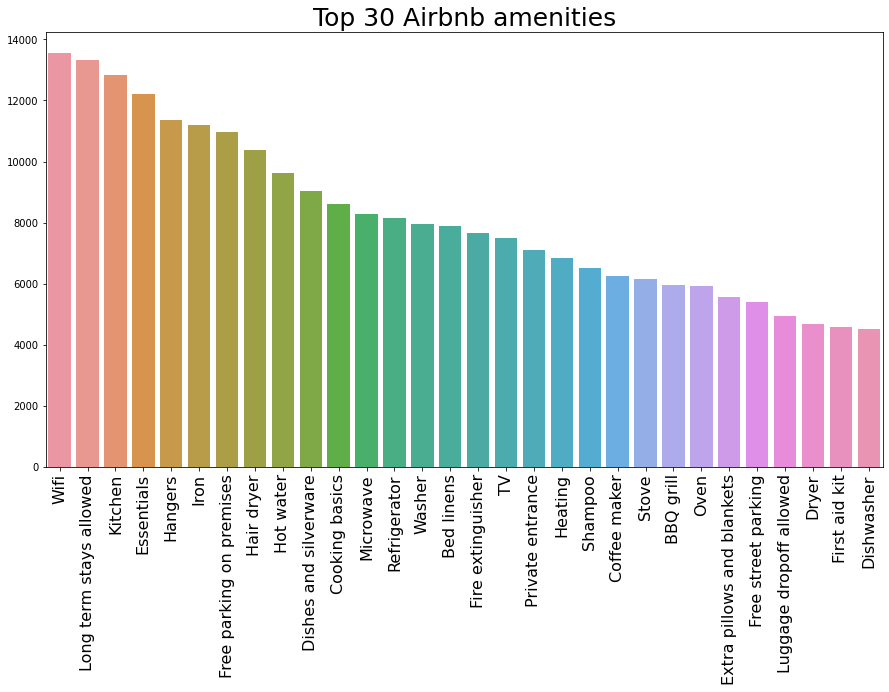

In [71]:
# barplot of amenity counts in high rated listings
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x = top_30.index, y = top_30)
ax.set_title('Top 30 Airbnb amenities', fontsize=25)
plt.xticks(rotation = 90, fontsize=16);

Observation:

High rated airbnbs offer wifi, allow for long-term stays, kitchen and it's components(dishes,cooking basics,refrigerator) and essentials(e.g toilet paper, soap), hangers, an iron and generally a very comfortable stay based on the top 30 amenities.

## 5.2 Question: Does it make a difference being a superhost?
Being a superhost takes a lot of work. To be a superhost you should:
  * Have an average rating of 4.8 and above
  * Have a response rate and acceptance rate of at least 90%
  * Response time within a day

### Comparisons between Superhosts and Standard hosts

During this analysis, we decided to use the data that had number of reviews greater than 4 to minimize biased rating scores

In [72]:
new = listings_df[listings_df['number_of_reviews']>=5]

In [73]:
new['host_is_superhost'].value_counts()

0    5549
1    2820
Name: host_is_superhost, dtype: int64

There is a class imbance in the column that defines if someone is a superhost or not. 

An equal sample size was taken for both superhost and non superhost for better analysis and comparison

In [74]:
# resampling the data
np.random.seed(42)
not_superhost = new[new.host_is_superhost == 0].sample(2820)
super_host = new[new.host_is_superhost == 1]
new_df1 = pd.concat([not_superhost, super_host])

In [75]:
# function to plot 
def plot(xcols, ycol,kind=None):
  a = 2  # number of rows
  b = 2  # number of columns
  c = 1  # initialize plot counter

  fig = plt.figure(figsize=(14,14))

# superhost/non_superhost double bargraphs of the features
  for i in xcols:
      plt.subplot(a, b, c)
      #plt.title('{}'.format(i))
      plt.xlabel(i, fontsize=16)
      if kind=='bar':
        sns.barplot(x = i,y=ycol, data=new_df1,hue='host_is_superhost', ci=None, palette='Blues')
        plt.legend(labels=['Not superhost','Superhost'], loc='best')
        c = c + 1
      else:
        sns.countplot(x = i, data=new_df1,hue='host_is_superhost', palette='Blues')
        plt.legend(labels=['Not superhost','Superhost'], loc='best')
        c = c + 1
  
  plt.tight_layout()
  plt.show()


### 5.2.1 response_rate, acceptance_rate, host_response_time, room_type of superhosts VS standard hosts

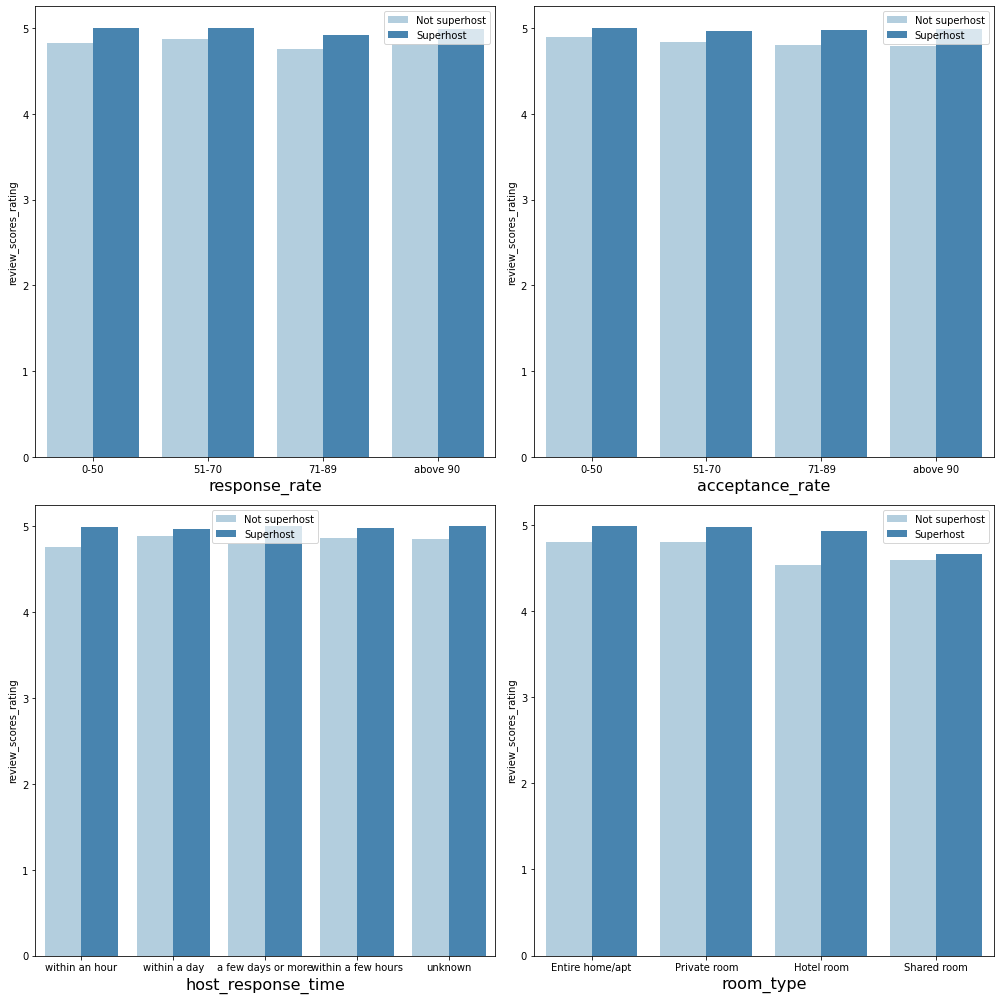

In [76]:
cols1 = ['response_rate', 'acceptance_rate', 'host_response_time', 'room_type']
plot(cols1, 'review_scores_rating', kind='bar')

Observations:

* We can see that for the same response rate,acceptance rate, response_time and room type, the superhosts tend to get a higher review score rating than a standard host.
* Superhosts have an average scores_rating of 5.

Higher ratings increase customer flow which leads to more income

### 5.2.2 How is the distribution of the response rate, acceptance_rate, response_time and hosting duration among hosts vs superhosts

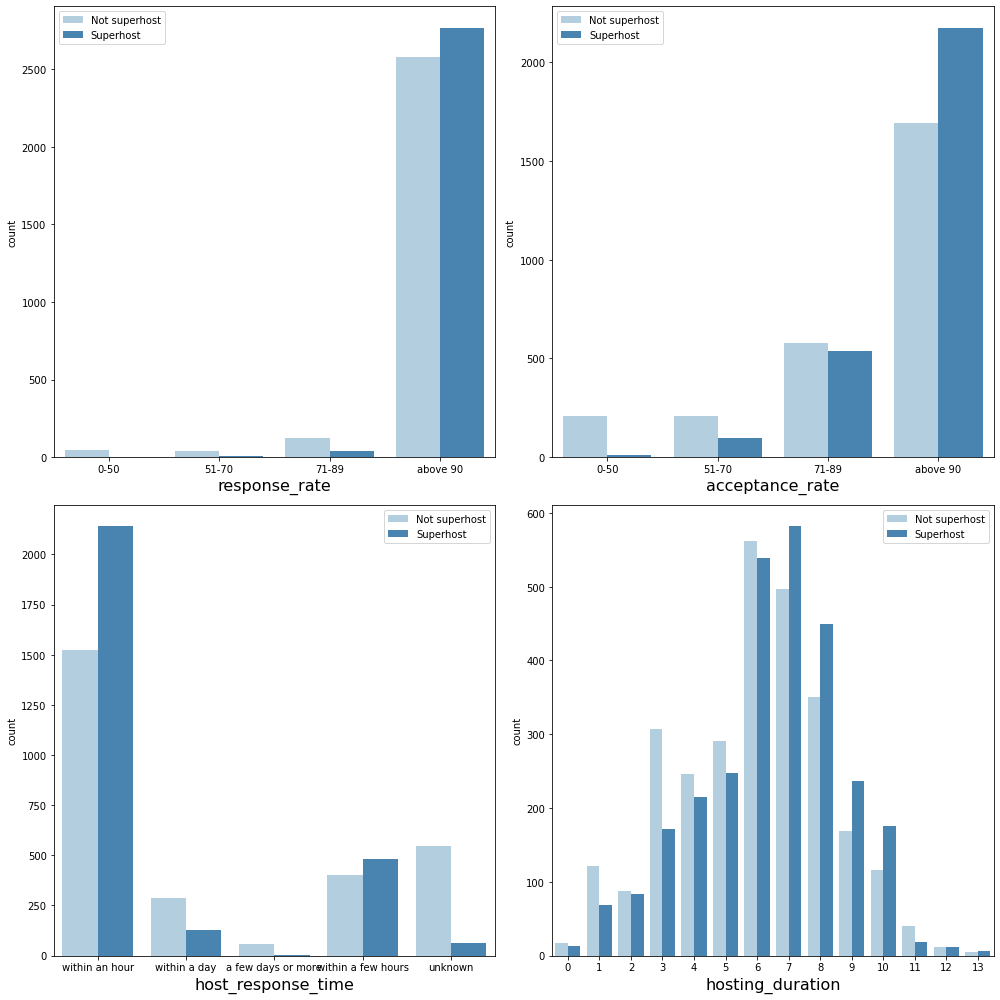

In [77]:
cols2 = ['response_rate', 'acceptance_rate', 'host_response_time','hosting_duration']
plot(cols2, 'review_scores_rating', kind='count')

Observations & Conclusions:

* Despite some few outliers, the high numbers in response rate, acceptance rate and response time go hand in hand with the expected superhost rates of above 90% and response time of within a day.
* High numbers of standard hosts can also be seen with the same high rates. However, there are more of these hosts in the lower categories.
* Although there are hosts who become superhosts in the early years, most of them are usually standard hosts.This starts to change at year 7.It seems it takes time for most people to become superhosts.

### 5.2.3 How do the different scores(accuracy, location, checkin, cleanliness) affect the overall rating for superhosts vs standard hosts?

In [78]:
# correlation between average score rating and the constituent scores
ratings_corr = new_df1[['review_scores_rating','review_scores_location', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_accuracy']].corr()
ratings_corr.loc[:,'review_scores_rating']

review_scores_rating         1.000000
review_scores_location       0.392004
review_scores_cleanliness    0.584996
review_scores_checkin        0.484572
review_scores_accuracy       0.667062
Name: review_scores_rating, dtype: float64

Observations & conclusions:

Accuracy and cleanliness seem the most correlated with the average overall rating. Location is the least.

* This could be because people get some impression of a place from the description. In the event that they have some expectations from a description which end up not being met in reality(accuracy), then the overall stay most likely during the stay they won't be as happy thus giving a general low rating or viceversa. 

* Cleaniness goes without say that it's very important thus the high correlation.

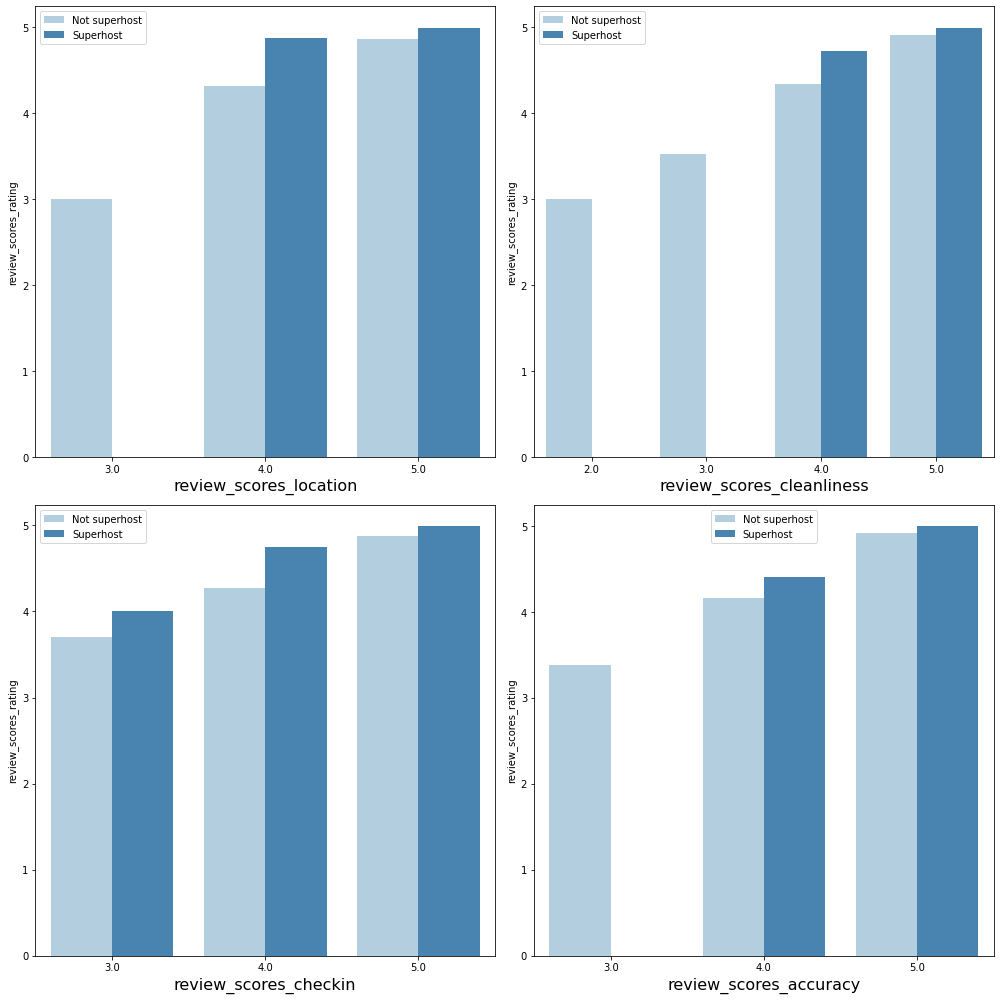

In [79]:
cols3 = ['review_scores_location', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_accuracy']
plot(cols3, 'review_scores_rating', kind='bar')

Observations:

* Superhosts take the day in overall score ratings against standard hosts given same score of constituent ratings

### 5.2.4 How is the pricing between the standard hosts and the superhosts

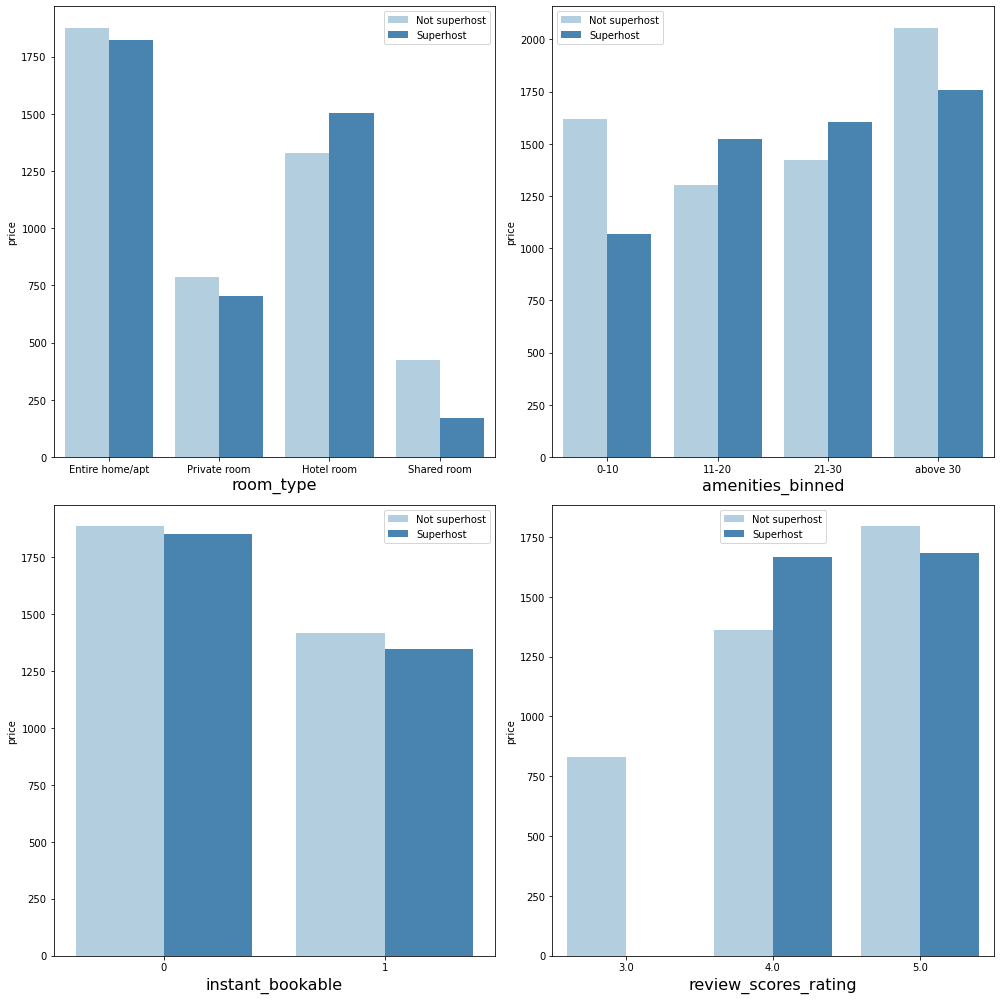

In [80]:
cols4 = ['room_type', 'amenities_binned', 'instant_bookable', 'review_scores_rating']
plot(cols4, 'price', kind='bar')

Observations & Conclusions:

* Except for hotel rooms, superhosts tend to charge cheaper on average.Actually, superhosts tend to charge 11% less than standard hosts. This could be attributed to the fact that superhosts enjoy more bookings, so even with lower prices, they end up making more money.
* Airbnbs that are not instantly bookable fetch higher prices. The instant booking is mostly used by new hosts in the business who want to increase the response time and rate and attract more reviews. So, in the same way, they may reduce prices to attract more clients.
* For superhosts,there is a systematic increase in price as the number of amenities increase unlike standard hosts whose prices are up for few amenities then go down again before going up
* Higher ratings definitely fetch higher prices. The pricing for ratings of 4 and 5 is almost same for superhosts. In this case, a user would definitely go for the 5 star. It would be advisable to aim for the 5 star

### Perks of being a superhost


* Priority support from airbnb
* Superhost badge leads to more visibility and more bookings, more bookings equals more income

## 5.3 Reviews sentiment Analysis

We will do a sentiment analysis of reviews to see which words are commonly used in the positive reviews

In [81]:
# viewing reviews dataframe
reviews_df.head(4)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,30332317,597314314,2020-01-25,7812767,Alan,Lovely rustic accommodation in a picturesque r...
1,30332317,532436007654450454,2022-01-04,367340518,Courtney,The hosts are friendly and takes good care of ...
2,9126484,63063726,2016-02-20,50272994,Carla,6 St Georges Building was lovely in every way....
3,9126484,67195563,2016-03-27,59937103,Gau,"Our host Bruce was great. Responsive, helpful ..."


In [82]:
# making a copy
reviews_copy = reviews_df.copy() 
# make a list for all the comments to be used for sentiment analysis
all_comments = reviews_copy.comments.tolist() 

We do not have the ratings of the reviews thus we do a sentiment analysis to determine this

### 5.3.1 Doing sentiment analysis

In [83]:
# sentiment analysis function
def sentiment_scores(review_comment):
    
    # Create a SentimentIntensityAnalyzer object.
    sent_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary which contains
    # pos, neg, neu, and compound scores.
    # The compound score is a metric that calculates the sum of all the lexicon ratings which have   
    # been normalized between -1(most extreme negative) and +1 (most extreme positive).
    # link :https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ 
    sentiment_dict = sent_obj.polarity_scores(review_comment)
     
    # conditions to decide sentiment as positive, negative and neutral\
    # positive sentiment : (compound score >= 0.05) 
    if sentiment_dict['compound'] >= 0.05 :     
        sentiment = 'Positive'
    #negative sentiment : (compound score <= -0.05)
    elif sentiment_dict['compound'] <= - 0.05 :       
        sentiment = 'Negative'
    #neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
    else :       
        sentiment = 'Neutral'
          
    return sentiment

In [84]:
# get the sentiments for every comment
# the_sentiments = [sentiment_scores(comment) for comment in all_comments]

In [85]:
# # Saving as a pickle file
# with open('/content/drive/Shareddrives/CapStone/Data/sentiments_list.pkl','wb') as f:
  # pickle.dump(the_sentiments, f)

In [86]:
# loading the pickle file
with open('/content/drive/Shareddrives/CapStone/Data/sentiments_list.pkl','rb') as f:
  sentiments_list = pickle.load(f)

 * we will then add these setiments to the reviews dataframe as an extra column called sentiment  

In [87]:
# creating a  sentiments column in reviews_df
reviews_copy['sentiment'] = sentiments_list

* Now we know which comments are positive, negative or neutral

### 5.3.2 Creating a bag of words for the reviews

* We need the words that are most common in positive reviews 

In [88]:
reviews_positive = reviews_copy[reviews_copy['sentiment']== 'Positive']
#reviews_negative = reviews_copy[reviews_copy['sentiment']== 'Negative']

In [89]:
# positive comments
positive_comments = reviews_positive.comments.tolist()
#negative_comments = reviews_negative.comments.tolist()

In [90]:
positive_comments[:2]

['Lovely rustic accommodation in a picturesque rural setting. Trudie and Jan were great hosts. My only regret was not being able to spend more time on the property, exploring its delights. I loved watching the guinea fowl being their silly selves, while I was drinking a cup of tea on the stoep in the mornings.',
 'The hosts are friendly and takes good care of their guests. The cottages are beautiful.']

In [91]:
# Creating a function that will preprocess and standardize the text for NLP 
def preprocess(text):
    ''' This function takes text to preprocess and standardize it for the purpose of NLP '''
 
    # Lowercase the text 
    text = text.str.lower()
    text= text.apply(lambda x: x.replace('</b>', ''))
    text= text.apply(lambda x: x.replace('<b>', ''))
    text= text.apply(lambda x: x.replace('<br />', ''))
    text= text.apply(lambda x: x.replace('<br/>', ''))
    
    # Remove punctuations using string module with regular expression
    text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

    # Split string by whitespace and remove extra whitespaces 
    text = text.apply(lambda x: x.split())

    # Remove stopwords of both english, german and french as these are the languages in the dataset
    stopwords = nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('french') + nltk.corpus.stopwords.words('german')
    text = text.apply(lambda x: [word for word in x if word not in stopwords])

    # Lemmatize text to group together words with the same root or lemma
    from nltk.stem.wordnet import WordNetLemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    text = text.apply(lambda x: ' '.join(x))

    return text

In [92]:
# # preprocessing the positive comments- this code takes long to run
# processed_positive = preprocess(reviews_positive['comments'])


In [93]:
# # Saving as a pickle file
# with open('/content/drive/Shareddrives/CapStone/Data/processed_positive.pkl','wb') as f:
#   pickle.dump(processed_positive, f)

In [94]:
# loading the pickle file
with open('/content/drive/Shareddrives/CapStone/Data/processed_positive.pkl','rb') as f:
  processed_positive = pickle.load(f)


##### Unigram count vectorizer for positive words

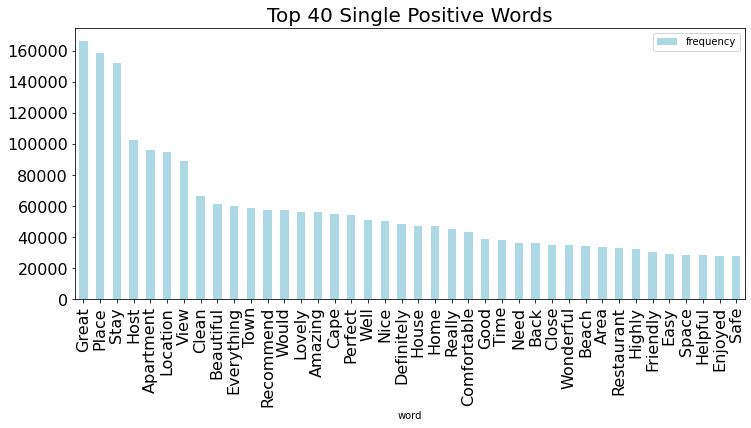

In [95]:
# instantiating count vectorizer for unigrams 
cv_pos_unigram = CountVectorizer()
cv_pos_matrix = cv_pos_unigram.fit_transform(processed_positive)
cv_pos_total = cv_pos_matrix.sum(axis=0)

cv_pos_freq = [(word.title(), cv_pos_total[0, i]) for word, i in cv_pos_unigram.vocabulary_.items()]
cv_pos_freq = sorted(cv_pos_freq, key = lambda x: x[1], reverse = True)
cv_pos_frequency = pd.DataFrame(cv_pos_freq, columns=['word', 'frequency'])

# Plotting Top 40 Most Frequent unigrams in positive comments with CV 
cv_pos_frequency.head(40).plot(x='word', y='frequency', kind='bar', figsize=(12, 5), color = 'lightblue')
plt.title('Top 40 Single Positive Words', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

##### Bigram count vectorizer for positive words

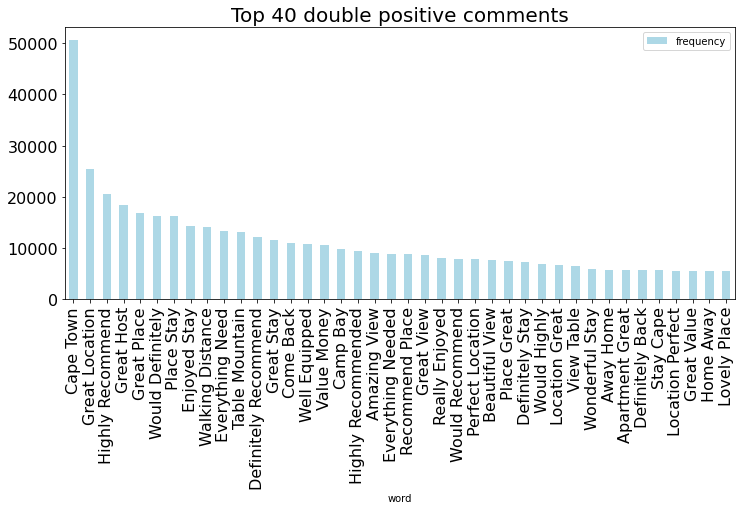

In [96]:
# instantiating count vectorizer for bigrams 
cv1_pos_bigram = CountVectorizer(ngram_range=(2,2))
# fitting to positive comments
cv1_pos_matrix = cv1_pos_bigram.fit_transform(processed_positive)
# getting the sum
cv1_pos_total = cv1_pos_matrix.sum(axis=0)
# creating a tuple of word vs freq
cv1_pos_freq = [(word.title(), cv1_pos_total[0, i]) for word, i in cv1_pos_bigram.vocabulary_.items()]
cv1_pos_freq = sorted(cv1_pos_freq, key = lambda x: x[1], reverse = True) # sorting
# pandas dataframe of the list of tuples
cv1_pos_frequency = pd.DataFrame(cv1_pos_freq, columns=['word', 'frequency'])

# Plotting Top 40 Most Frequent bigrams in positive comments with CV 
cv1_pos_frequency.head(40).plot(x='word', y='frequency', kind='bar', figsize=(12, 5), color = 'lightblue')
plt.title('Top 40 double positive comments', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Observations:

* From the unigram and bigram, the idea we can get is that people like great locations, friendly hosts, well equipped, amazing views, safe, beautiful,clean places. Also they are highly likely to go back to whichever lisitng they reviewed.
* Cape Town, cape and town appear a lot and this is because most of the listings are in capetown.

# 6. Preprocessing

In [97]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17474 entries, 0 to 17473
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   index                           17474 non-null  int64   
 1   id                              17474 non-null  int64   
 2   listing_url                     17474 non-null  object  
 3   host_url                        17474 non-null  object  
 4   name                            17474 non-null  object  
 5   description                     17474 non-null  object  
 6   neighborhood_overview           17474 non-null  object  
 7   neighbourhood_cleansed          17474 non-null  object  
 8   host_response_time              17474 non-null  object  
 9   host_response_rate              17474 non-null  float64 
 10  host_acceptance_rate            17474 non-null  float64 
 11  host_is_superhost               17474 non-null  int64   
 12  property_type     

## Joining relevant object columns.

The obejctive is to create a recommendation system that would function as a search engine. Because of this joining the relevant features when looking at listings is important because the model would take in a user's input and search for the optimal listings that fit the desciption.

In [98]:
# creating a copy of the dataframe
listings_df_copy = listings_df.copy()
# changing amenities from list to string type
listings_df_copy['amenities'] = listings_df_copy['amenities'].apply(lambda x: ','.join(x))
# changing dataframe view settings
pd.set_option('display.max_columns', None)

In [99]:
# joining the object type features to create a content feature
listings_df_copy['contents'] = (listings_df_copy['name'] + ' ' 
                                + listings_df_copy['description'] + ' ' 
                                + listings_df_copy['neighborhood_overview'] + ' ' 
                                + listings_df_copy['property_type'] + ' ' 
                                + listings_df_copy['room_type'] + ' ' 
                                + listings_df_copy['amenities'] + ' ' 
                                + listings_df_copy['cities'])

In [100]:
# preprocessing contents feature
listings_df_copy['contents'] = preprocess(listings_df_copy['contents'])
listings_df_copy['contents'][1]

'jubilee square apartment comfortably furnished 1st floor 2 bedroom apartment heart historical village simon town beautiful false bay coast apartment overlook jubilee square partial view simon bay boat marina tree spacemain bedroom king size bed separate access bathroom second bedroom 2 x single bed full bathroom toilet bath shower bath kitchen fully equipped cooking utensil might need including dish washer balcony overlook main street jubilee square building coin operated laundry facility wi fi smart tv netflix however dstv please note strictly non smoking apartment guest accesswhole apartment thing notenon smoking apartment apartment situated main street directly opposite jubilee square center town simon town historical naval village restaurant coffee shop lot quirky shop selling different thing clothing nautical artifact thing need within walking distance take drive kalk bay find excellent restaurant fishing boat return around midday take stroll harbor pick fresh fish dinner even wa

# Recommendation System

## Count vectorizer 

In [101]:
# Convert the content column to a matrix of word counts
# Most frequent words with Count Vectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1,2))
cv_matrix = cv.fit_transform(listings_df_copy['contents'])
cv_total = cv_matrix.sum(axis=0)

cv_freq = [(word.title(), cv_total[0, i]) for word, i in cv.vocabulary_.items()]
cv_freq = sorted(cv_freq, key = lambda x: x[1], reverse = True)
# word frequency dataframe 
cv_frequency = pd.DataFrame(cv_freq, columns=['word', 'frequency'])


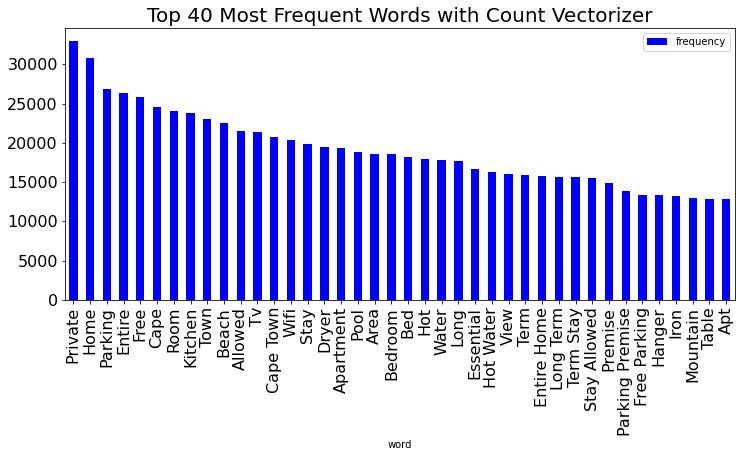

In [102]:
# Plotting Top 40 Most Frequent Words in contents feature with CV 
cv_frequency.head(40).plot(x='word', y='frequency', kind='bar', figsize=(12, 5), color = 'blue')
plt.title('Top 40 Most Frequent Words with Count Vectorizer', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

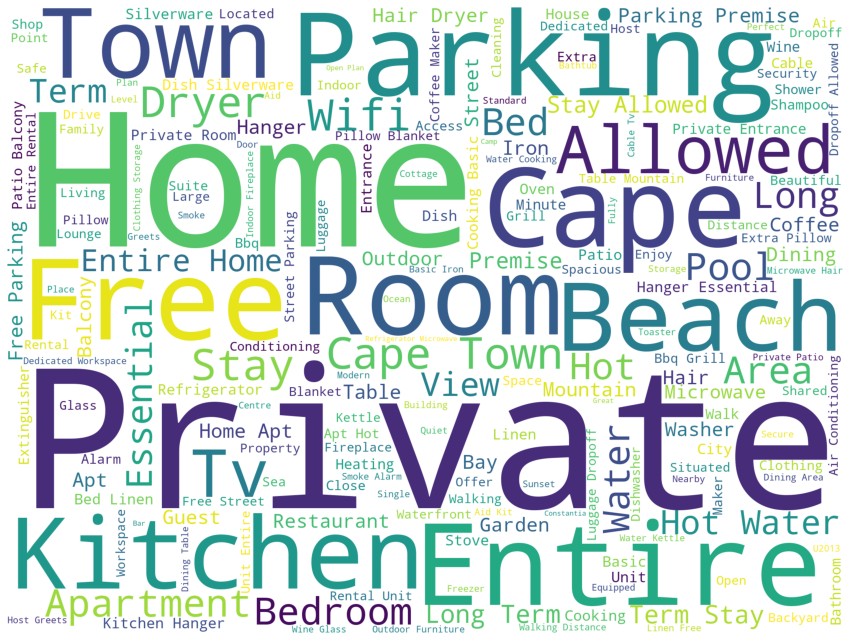

In [103]:
# Wordcloud of the words with Count Vectorizer
wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1500).generate_from_frequencies(dict(cv_freq))
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off');

In [104]:
# transfoming an example query into a vector
query = cv.transform(['I want an apartment in cape town with free parking'])
# printing the simmilarities of the query to the records in contents
print(cosine_similarity(query, cv_matrix))

[[0.07090792 0.18662779 0.09944903 ... 0.19275709 0.12826707 0.08253478]]


In [105]:
# creating a variable for the simmilarities
similarity = cosine_similarity(query, cv_matrix)
# top 5 similar lisitngs
sorting = np.argsort(similarity[0])

In [106]:
# displaying top 5 scores with count vectorizer
cv_scores = similarity[0]
cv_scores.sort()
cv_scores[-5:]

array([0.43114697, 0.43180043, 0.46801709, 0.47161417, 0.47356516])

In [107]:
# checking the most similar listing
pd.DataFrame(listings_df.loc[13030]).T

,index,id,listing_url,host_url,name,description,neighborhood_overview,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,cities,amenities_count,hosting_duration,response_rate,acceptance_rate,accommodate,amenities_binned
13030,14152,52071738,https://www.airbnb.com/rooms/52071738,https://www.airbnb.com/users/show/22496581,Studio Apt 5mins to Biscuit Mill + Cape Town CBD,"Clean, stylish, safe & comfortable apartment o...","Woodstock is the grungy, urban creative heart ...",Ward 115,within a few hours,100.0,100.0,1,Entire condo,Entire home/apt,2,1.0,1.0,1.0,"[Hot water, Cleaning products, Cooking basics,...",520.0,13,5.0,5.0,5.0,5.0,5.0,5.0,0,1,Cape Town,38,8,above 90,above 90,1-4 people,above 30


### Simple recommender with CV

In [108]:
# basic recommender using count vectorized words
def recommend_five():
    ''' This function asks the user a question and then takes in the answer to finds the top 5 similar listings '''
    
    question = input('What are some features you are interested in? ')
    lowercased = question.lower()
    # count vectorize the question
    inquiry = cv.transform([question])

    # Calculate cosine similarity of inquiry with the cv_matrix
    similarity = cosine_similarity(inquiry, cv_matrix)
    
    # Obtain the index then sort, picking top 5
    nums = np.argsort(similarity[0])[-5:]

    #return the top 5
    return listings_df['name'].loc[nums]

In [109]:
# checking whether its working
recommend_five()

What are some features you are interested in? mice


5822     Spacious, Modern Cottage between Mountains and...
5821                      Comfortable bedroom in townhouse
5820                        KaapKloof Manor for 8 persons.
5826                 Perfect location Studio  in Camps Bay
17473    Hibernian 301 in Strand with a beautiful sea view
Name: name, dtype: object

## TF-IDF Vectorizer
TF-IDF is a method that assigns a numerical weightage of words which reflects how important the particular word is to a document in corpus. N-grams are continuous sequence of words or symbols or tokens in a document. 

The text will be vectorized with TF-IDF using Unigrams, Bigrams and Trigrams and evaluate the most frequent words with each ngram.

### Unigrams

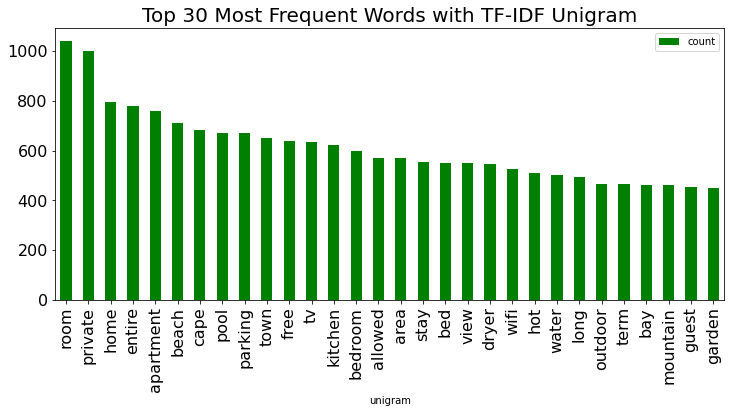

In [110]:
# Converting text descriptions into vectors using TF-IDF using Unigrams
tf = TfidfVectorizer(ngram_range=(1, 1), lowercase = False)
tf_matrix = tf.fit_transform(listings_df_copy['contents'])
tf_total = tf_matrix.sum(axis=0) 
# Finding the word frequency
tf_freq = [(word, tf_total[0, idx]) for word, idx in tf.vocabulary_.items()]
tf_freq = sorted(tf_freq, key = lambda x: x[1], reverse=True)
# Converting into dataframe 
unigram = pd.DataFrame(tf_freq, columns = ['unigram', 'count'])

# Plotting the bigram distribution of top 30 words 
unigram.head(30).plot(x='unigram', y='count', kind='bar', figsize=(12, 5), color = 'green')
plt.title('Top 30 Most Frequent Words with TF-IDF Unigram', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

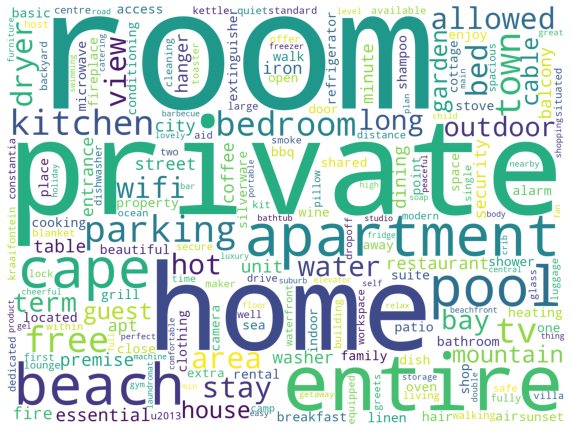

In [111]:
# Wordcloud of the words with TF-IDF Vectorizer with Unigram
wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1500).generate_from_frequencies(dict(tf_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off');

Observations: 

* Listing descriptions emphasize on amenities, with top ones being: 
    - private rooms(accommodation)
    - parking
    - TV and wifi
    - Location or view of the beach - This is due to the Western Cape area having a coastline.

### Bigram

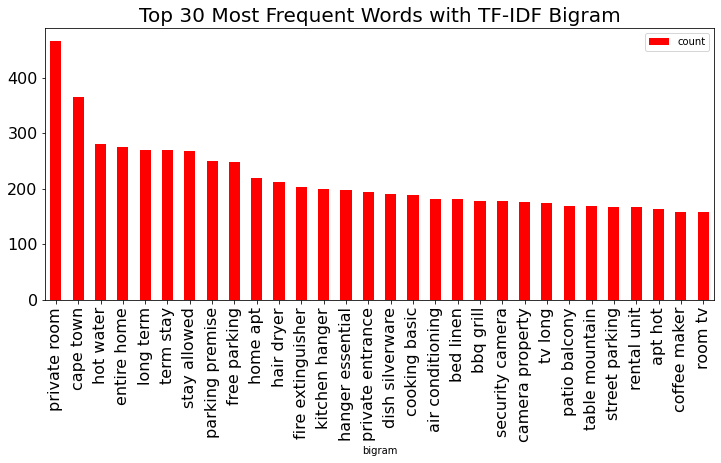

In [112]:
# Converting text descriptions into vectors using TF-IDF using Bigram
tf2 = TfidfVectorizer(ngram_range=(2, 2), lowercase = False)
tf2_matrix = tf2.fit_transform(listings_df_copy['contents'])
tf2_total = tf2_matrix.sum(axis=0) 
# Finding the word frequency
tf2_freq = [(word, tf2_total[0, idx]) for word, idx in tf2.vocabulary_.items()]
tf2_freq = sorted(tf2_freq, key = lambda x: x[1], reverse=True)
# Converting into dataframe 
bigram = pd.DataFrame(tf2_freq, columns = ['bigram', 'count'])

# Plotting the bigram distribution of top 30 words
bigram.head(30).plot(x='bigram', y='count', kind='bar', figsize=(12, 5), color = 'red')
plt.title('Top 30 Most Frequent Words with TF-IDF Bigram', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

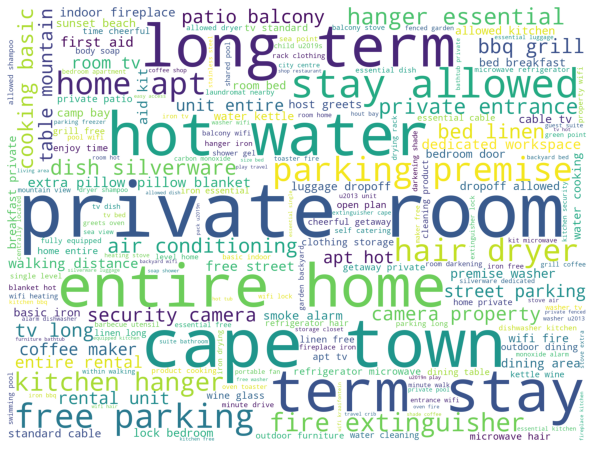

In [113]:
# Wordcloud of the words with TF-IDF Vectorizer with Bigram
wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1500).generate_from_frequencies(dict(tf2_freq))
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud)
plt.axis('off');

### Unigram - Bigram

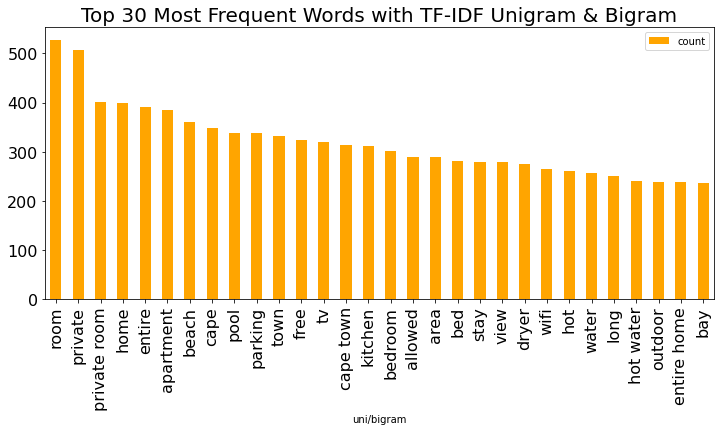

In [114]:
# Converting text descriptions into vectors using TF-IDF using Unigrams & Bigrams
tf_1_2 = TfidfVectorizer(ngram_range=(1, 2), lowercase = False)
tf1_matrix = tf_1_2.fit_transform(listings_df_copy['contents'])
tf1_total = tf1_matrix.sum(axis=0) 
# Finding the word frequency
tf1_freq = [(word, tf1_total[0, idx]) for word, idx in tf_1_2.vocabulary_.items()]
tf1_freq = sorted(tf1_freq, key = lambda x: x[1], reverse=True)
# Converting into dataframe 
unibigram = pd.DataFrame(tf1_freq, columns = ['uni/bigram', 'count'])

# Plotting the bigram distribution of top 30 words 
unibigram.head(30).plot(x='uni/bigram', y='count', kind='bar', figsize=(12, 5), color = 'orange')
plt.title('Top 30 Most Frequent Words with TF-IDF Unigram & Bigram', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

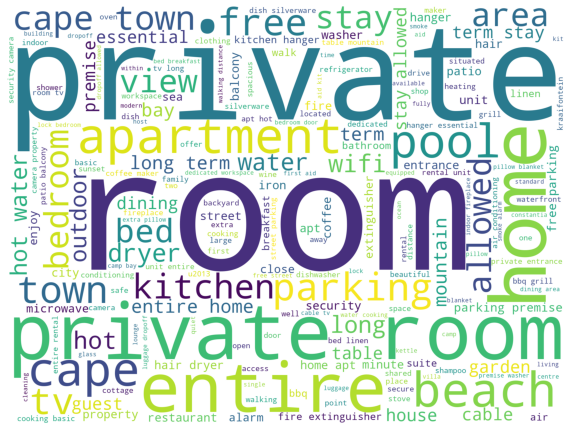

In [115]:
# Wordcloud of the words with TF-IDF Vectorizer with Unigram & Bigram
wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1500).generate_from_frequencies(dict(tf1_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off');

### Trigram

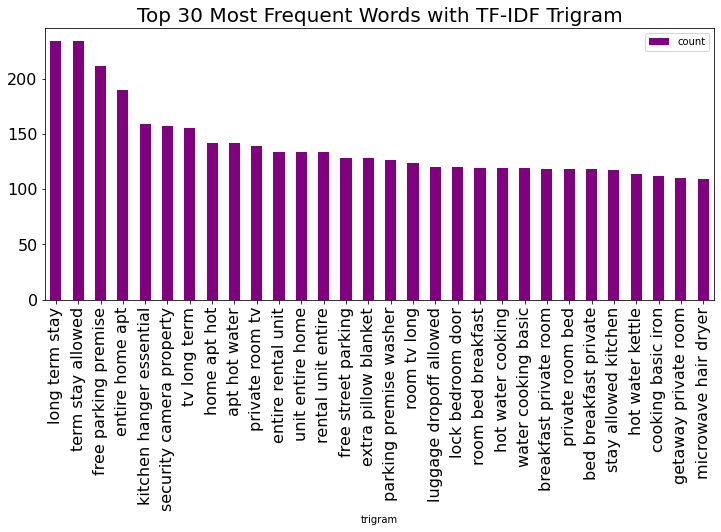

In [116]:
# Converting text descriptions into vectors using TF-IDF using Trigram
tf3 = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tf3_matrix = tf3.fit_transform(listings_df_copy['contents'])
tf3_total = tf3_matrix.sum(axis=0) 

# Finding the word frequency
tf3_freq = [(word, tf3_total[0, idx]) for word, idx in tf3.vocabulary_.items()]
tf3_freq =sorted(tf3_freq, key = lambda x: x[1], reverse=True)
# Converting into dataframe 
trigram = pd.DataFrame(tf3_freq, columns = ['trigram', 'count'])

# Plotting the trigram distribution of top 30 words 
trigram.head(30).plot(x='trigram', y='count', kind='bar', figsize=(12, 5), color = 'purple')
plt.title('Top 30 Most Frequent Words with TF-IDF Trigram', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

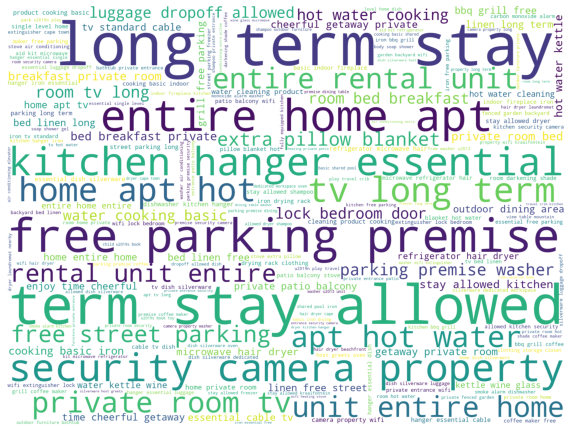

In [117]:
# Wordcloud of the words with TF-IDF Vectorizer with Trigram
wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1500).generate_from_frequencies(dict(tf3_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off');

## Recommender with TF-IDF 

Cosine similarity will be used to create a recommender system, cosine similarities will be calculated between listings and with Bigram TF-IDF vectorizer as single words do not provide much meaning.

### Using bigrams

In [118]:
# recommender using bigrams
def bi_recommender(content):
    lowercased = content.lower()
    inquiry = tf2.transform([lowercased])

    similarity = cosine_similarity(inquiry, tf2_matrix)
    nums = np.argsort(similarity[0])[-5:]

    ls = similarity[0]
    ls.sort()
    print(ls[-5:])
    print(nums)

    return listings_df[['name', 'listing_url']].loc[nums]

In [119]:
bi_recommender('I want an apartment in cape town with free parking')

[0.122046   0.12626446 0.12712599 0.13472817 0.13648454]
[16875 14371  9126 13030 16280]


,name,listing_url
16875,Private room with bathroom + dedicated workspace,https://www.airbnb.com/rooms/638934081096063052
14371,Spacious 2 Bed with a private pool,https://www.airbnb.com/rooms/54133173
9126,Westward 9,https://www.airbnb.com/rooms/37902818
13030,Studio Apt 5mins to Biscuit Mill + Cape Town CBD,https://www.airbnb.com/rooms/52071738
16280,De Waterkant Luxe Apartment | Pool | BBQ | Wifi,https://www.airbnb.com/rooms/620661662687895653


In [120]:
bi_recommender('pool')

[0. 0. 0. 0. 0.]
[ 5822  5821  5820  5826 17473]


,name,listing_url
5822,"Spacious, Modern Cottage between Mountains and...",https://www.airbnb.com/rooms/22407293
5821,Comfortable bedroom in townhouse,https://www.airbnb.com/rooms/22407175
5820,KaapKloof Manor for 8 persons.,https://www.airbnb.com/rooms/22660061
5826,Perfect location Studio in Camps Bay,https://www.airbnb.com/rooms/22824032
17473,Hibernian 301 in Strand with a beautiful sea view,https://www.airbnb.com/rooms/20855840


In [121]:
bi_recommender('beach apartment')

[0.15373957 0.17323478 0.21320328 0.2513249  0.27047065]
[ 6838 13897 12948 17395  6198]


,name,listing_url
6838,A stone-throw away from the beach apartment,https://www.airbnb.com/rooms/28154880
13897,Sexy 3 bedroom beach apartment,https://www.airbnb.com/rooms/53483771
12948,Cosy 2-bedroom beach apartment with balcony view,https://www.airbnb.com/rooms/51296612
17395,"Beach Apartment, Strand",https://www.airbnb.com/rooms/17047899
6198,Beach apartment with mountain and sea views,https://www.airbnb.com/rooms/24125122


In [122]:
# # Comparing each lisitng with every other listing in the dataset
# # Each row and each column is a listing from the dataset
# cosine_similarity(tf2_matrix)

In [123]:
# Using an ngram range 1 through 3, so we can use words which contain up to 4 continuous sequence of words or tokens
tfidf_rec = TfidfVectorizer(ngram_range=(1, 3), lowercase = False)
tfidf_matrix = tfidf_rec.fit_transform(listings_df_copy['contents'])
cosine_sim = cosine_similarity(tfidf_matrix)

### Using trigrams

In [124]:
# recommender using trigrams
def tri_recommender(content):
	lowercased = content.lower()
	similarity = cosine_similarity(tfidf_rec.transform(np.array([lowercased])), tfidf_matrix)
	nums = np.argsort(similarity[0])[-5:]

	ls = similarity[0]
	ls.sort()
	print(ls[-5:])
	print(nums)

	return listings_df[['name', 'listing_url']].loc[nums]

In [125]:
tri_recommender('I want an apartment in cape town with free parking')

[0.04986107 0.0537182  0.05545586 0.05736375 0.06046664]
[ 7896  7917 15177  4412  6326]


,name,listing_url
7896,♡ Charming retro-chic on Kloof Street,https://www.airbnb.com/rooms/32390753
7917,James’s peace nest,https://www.airbnb.com/rooms/31841021
15177,City Views Waterfront Apt♥with fast uncapped W...,https://www.airbnb.com/rooms/579561983761604933
4412,Beach apartment with shared swimming pool,https://www.airbnb.com/rooms/19046513
6326,Stylish Kloof Street Apartment w/aircon & balcony,https://www.airbnb.com/rooms/26117814


In [126]:
tri_recommender('beach apartment')

[0.11382353 0.11917142 0.1392307  0.16143801 0.18938285]
[ 9903 13897 12948 17395  6198]


,name,listing_url
9903,Beautiful Beach Apartment,https://www.airbnb.com/rooms/40523095
13897,Sexy 3 bedroom beach apartment,https://www.airbnb.com/rooms/53483771
12948,Cosy 2-bedroom beach apartment with balcony view,https://www.airbnb.com/rooms/51296612
17395,"Beach Apartment, Strand",https://www.airbnb.com/rooms/17047899
6198,Beach apartment with mountain and sea views,https://www.airbnb.com/rooms/24125122


In [127]:
tri_recommender('pool')

[0.08847284 0.08847301 0.08854154 0.09232813 0.10902487]
[ 3204  4054  6540 10502  2880]


,name,listing_url
3204,The Pool Room,https://www.airbnb.com/rooms/15173501
4054,Camps Bay Apartment - Breathtaking Views + Pool,https://www.airbnb.com/rooms/17430852
6540,"Lux Heated pool, close to wine farms - 4 Bathr...",https://www.airbnb.com/rooms/26724197
10502,Camps Bay Picuturesque,https://www.airbnb.com/rooms/42026490
2880,"Luxury 2 bedroom, V&A Marina apartment",https://www.airbnb.com/rooms/13793086


# Final Recommender
From the results above, the TF-IDF Vectorizer which takes into account upto 3 continuous sequence of words is the most promising recommender. 

Taking this into account, a function is created to make use of this vectorizer.

In [128]:
# final recommender
def final_recommender():
    ''' This function asks the user a question and then takes in the answer to finds the top 5 similar listings '''

    tfidf_rec = TfidfVectorizer(ngram_range=(1, 3), lowercase = False)
    tfidf_matrix = tfidf_rec.fit_transform(listings_df_copy['contents'])
    
    question = input('What are some features you are interested in? ')
    lowercased = question.lower()
    
    # count vectorize the question
    inquiry = tfidf_rec.transform(np.array([lowercased])) 

    # Calculate cosine similarity of inquiry with the cv_matrix
    similarity = cosine_similarity(inquiry, tfidf_matrix)
    
    # Obtain the index then sort, picking top 5
    nums = np.argsort(similarity[0])[-5:]    
    ls = similarity[0]
    ls.sort()
    # printing scores
    print(ls[-5:])
    print(nums)

    return listings_df[['id', 'name', 'listing_url', 'price']].loc[list(reversed(nums))]

## Proof of concept

In [129]:
# grouping by reviewers in the review dataframe
reviews_positive.groupby(by='reviewer_id').count()['id'].sort_values(ascending=False).head(6)

reviewer_id
206698781    58
42052590     37
48640754     32
394379056    32
41455737     30
349125069    30
Name: id, dtype: int64

First description

In [130]:
listings_df[listings_df['id'] == 21350084]['description'][5274]

'A single bedroom (140 cm bed) with en-suite bathroom on the ground floor, separate from the hosts that live upstairs. Newly renovated, the bathroom has a glass door shower, toilet and basin. The room has a door that leads to the private outside shady patio. Perfect for a single traveler.<br /><br /><b>The space</b><br />The room is private and on the ground floor, so you can move in and out as you please. It is in a quiet part of the house, and although we live close to Main Road, the room has a kind of atmosphere that cuts out the urban noise. It is truly a quaint room with a special character, and perfect for a rest after a day of exploring Cape Town.<br /><br /><b>Guest access</b><br />The room is at the end of the entrance and leads to the ground floor patio.<br /><br /><b>Other things to note</b><br />The house is close to good restaurants, the promenade for beach walks, and it is a quick uber trip from here to the tourist attractions all-round. We also offer fast wifi.'

In [131]:
# A single bedroom glass door shower cape town ground floor patio
final_recommender()

What are some features you are interested in? A single bedroom glass door shower cape town ground floor patio
[0.06662803 0.08122505 0.08225025 0.08229556 0.10500016]
[ 1768  9531  9407 10595  5274]


,id,name,listing_url,price
5274,21350084,Single en-suite - with walkout patio garden,https://www.airbnb.com/rooms/21350084,420.0
10595,42262802,Cozy Bedroom with Bathroom and Private Entrance,https://www.airbnb.com/rooms/42262802,510.0
9407,39233892,Deluxe Garden Suite,https://www.airbnb.com/rooms/39233892,1394.0
9531,39054795,"Somerset West, central winelands, close to shops",https://www.airbnb.com/rooms/39054795,900.0
1768,9284194,"Sunny, contemporary apartment",https://www.airbnb.com/rooms/9284194,900.0


Second description

In [132]:
listings_df[listings_df['id'] == 7623017]['description'][1255]

'Self-catering,<br />3 double bedrooms with sea view,<br />Indoor pool, sauna, sun terrace and gym,<br />Two secure parking places,<br />Underfloor heating,<br />Fully equipped kitchen,<br />Huge terrace,<br />Gas BBQ,<br />24-hour front desk, concierge, security,<br />Airport collections & transfers service on request.'

In [133]:
# self catering indoor pool terrace secure parking
final_recommender()

What are some features you are interested in? self catering indoor pool terrace secure parking
[0.05805081 0.05989884 0.05997794 0.06684348 0.11546599]
[ 920 3893 1255 1439  884]


,id,name,listing_url,price
884,4943507,"Bakoven, Luxury Villa, 4 - 5 people",https://www.airbnb.com/rooms/4943507,7500.0
1439,8065439,Fairfield Cottage,https://www.airbnb.com/rooms/8065439,2000.0
1255,7623017,Luxury three bedroom beachfront apartment,https://www.airbnb.com/rooms/7623017,1196.0
3893,16656995,"Entire Mediterranean Villa, 1 mile CapeTown Beach",https://www.airbnb.com/rooms/16656995,446.0
920,5321177,A Luxury in Cape Town: Beneath Table Mountain,https://www.airbnb.com/rooms/5321177,756.0


Third description

In [134]:
listings_df[listings_df['id'] == 22766893]['description'][5905]

"A homely domestic 2-bed flat in the middle of a cosmopolitan Café society, situated on top of various late night eateries surrounding a quarry filled with water. Close to N1, wine routes Durbanville, 20 mins from Blaauwberg beach and Stellenbosch, 35 mins from Cape Town city centre.  Ideal for short breaks away or stay over when travelling/touring. All the basic necessities, basic wifi (not fibre), use of kitchen and utensils, bath and shower, private domicile.<br /><br /><b>The space</b><br />Homely flat,  basic but comfortable, ideal for short breaks.  Two separate and private bedrooms, main with double bed and smaller room with single bed. <br />Full bathroom with bath and shower. Open plan kitchen and lounge leading out to balcony . Lock-up and go. Undercover parking for 1 car, near lift. <br />Second floor. Lovely view of waterfilled quarry, quiet during the day but busy and slightly noisy or 'buz'  evenings until about 11pm.<br />Regret no TV, and only low level wifi, not suitab

In [135]:
# late night eateries  basic but comfortable, ideal for short breaks waterfilled quarry
final_recommender()

What are some features you are interested in? late night eateries  basic but comfortable, ideal for short breaks waterfilled quarry
[0.04077721 0.04971388 0.0614553  0.06221581 0.18083634]
[17122  7395  6814 13013  5905]


,id,name,listing_url,price
5905,22766893,Café Society Flat,https://www.airbnb.com/rooms/22766893,330.0
13013,52052577,LUCA'S LODGE,https://www.airbnb.com/rooms/52052577,2500.0
6814,28576754,Flower House,https://www.airbnb.com/rooms/28576754,450.0
7395,30269033,Flower house bedroom 2,https://www.airbnb.com/rooms/30269033,600.0
17122,645963345594866907,The Crazy Central Cape Town - 2 bedroom apartment,https://www.airbnb.com/rooms/645963345594866907,560.0


In [136]:
# reviews_positive[reviews_positive['reviewer_id'] == 48640754]

# Conclusions

The project objectives were met and the conclusions include:

1.) While it is possible to be a superhost within the first year of hosting, the peak duration is from 6 years for most hosts.

2.) The top rated listings had the following amenities: Wifi, allow for Long Term Stay, Kitchen and its essentials, Hair Dryer, Dishwasher, Washer, Iron, Fire Extinguisher, Private Entrance, Free Parking, First Aid Kit.

3.) Most airbnbs are located within Cape Town. Mostly because its the capital of the area. Newlands, Constantia and CapeTown fetch higher prices per listing.

4.) There is a thin difference between superhosts and standard hosts based on their features e.g amenities, ratings, etc. However, the advantage of superhosts is that they are prioritized when searching for airbnbs which translate to more customers hence income.

5) The recommender is matching the inputs with a relatively good similarity scores. The recommendations have a cosine similarity of 0.1 and above.

# Recommendations

1.) Investing in Cape Town is a good idea, given its popularity, proximity to Robben Island (a historically significant island) and being top 3 in terms of price per night, the return on investment would be higher. 
    
- For high end clientelle, having  a listing in Newlands, which is at the foot of Table Mountain, Constantia for wine enthusiasts.

2.) As much as there isn't a big difference in stats for super/standard hosts, being a superhost is advantageous for income.

3.) The model can be deployed in airbnb sites for for A/B testing in user text searches. If user feedback is great, implement the recommender.

4.) Investigate airbnb reviews as some of them could have doctored reviews by their host or allies to the bnb.

5.) Maintaining high levels of cleanliness and description accuracy are key in customer satisfaction and therefore attract higher ratings.

# Follow up questions

## a) Did we have the right data?

Yes. However, we wanted to create a classification model but it was not feasible due to overlapping characteristics of standard vs superhosts. 

## b) Do we need other data to answer our question?

Yes. There could be other latent factors as to the superhost tag not represented in the data used.

## c) Did we have the right question?

Yes, as the aim of the analysis was to build an accurate recommender for what users search.